## Exploratory Data Analysis and Visualization

After data cleaning, Exploratory Data Analysis (EDA) and Visualization are conducted to: 

1. **Understand the data**: EDA helps to provide a comprehensive understanding of the data, including its structure, patterns, and relationships. 

2. **Identify patterns and relationships**: it can also help to identify patterns and relationships between variables that may not be immediately apparent. This can help to generate hypotheses and guide further analysis. Most importantly, it enables us to identify good predictor variables for subsequent model building.

3. **Communicate insights**: Visualization techniques can help to communicate data insights and present findings a clear and understandable way. This can help to facilitate decision-making and drive subsequent modeling action based on the data.

4. **Select appropriate models**: EDA and visualization can help to identify which statistical models or machine learning algorithms may be appropriate for the data. This can help to ensure that the analysis is appropriate and accurate.

5. **Validate assumptions**: EDA and visualization can help to validate assumptions about the data, such as those identified in our secondary research ealier. This can help to ensure that the analysis is appropriate and accurate.


In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
#Import cleaned dataset
hypertension = pd.read_csv('hypertension.csv')
hypertension.head()

,Unnamed: 0,_TOTINDA,_BMI5,DROCDY3_,AVEDRNK3,_RFBING5,CHOLMED3,FRENCHF1,FRUTDA2_,FTJUDA2_,...,_RFCHOL3,_MICHD,_EDUCAG,_CASTHM1,_RFSMOK3,_DRDXAR3,_IMPRACE,_AGE80,AlchoIntake,FriesFreq
0,3,Yes,33.47,14.0,3.0,Yes,No,204.0,0.43,0.71,...,Yes,No,Graduated High School,No,No,No,White,62.0,2.94,0.571429
1,9,Yes,39.94,10.0,2.0,No,Yes,202.0,1.00,0.00,...,No,No,Graduated High School,No,No,Yes,White,65.0,1.40,0.285714
2,22,No,35.87,13.0,2.0,No,Yes,304.0,0.07,0.03,...,Yes,No,Graduated High School,No,Yes,No,White,68.0,1.82,0.133333
3,49,Yes,22.24,3.0,1.0,No,Yes,201.0,0.43,0.00,...,Yes,Yes,Graduated High School,No,No,Yes,White,77.0,0.21,0.142857
4,61,Yes,27.84,10.0,2.0,Yes,No,307.0,1.00,0.10,...,No,No,Graduated from College or Technical School,No,No,No,White,58.0,1.40,0.233333


In [3]:
hypertension.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76825 entries, 0 to 76824
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   76825 non-null  int64  
 1   _TOTINDA     76825 non-null  object 
 2   _BMI5        76825 non-null  float64
 3   DROCDY3_     76825 non-null  float64
 4   AVEDRNK3     76825 non-null  float64
 5   _RFBING5     76825 non-null  object 
 6   CHOLMED3     76825 non-null  object 
 7   FRENCHF1     76825 non-null  float64
 8   FRUTDA2_     76825 non-null  float64
 9   FTJUDA2_     76825 non-null  float64
 10  VEGEDA2_     76825 non-null  float64
 11  MENTHLTH     76825 non-null  float64
 12  PHYSHLTH     76825 non-null  float64
 13  _RFHYPE6     76825 non-null  object 
 14  DIABETE4     76825 non-null  object 
 15  _RFCHOL3     76825 non-null  object 
 16  _MICHD       76825 non-null  object 
 17  _EDUCAG      76825 non-null  object 
 18  _CASTHM1     76825 non-null  object 
 19  _RFS

### Understand the Dataset

- Response variable: `Hypertension`


- Numeric variables include:
    1. `_BMI5`
    2. `AlchoIntake`
    3. `FriesFreq`
    4. `FRUTDA2_`
    5. `FTJUDA2_`
    6. `VEGEDA2_`
    7. `MENTHLTH`
    8. `PHYSHLTH`
    9. `_AGE80`


- Categorical variables include:
    1. `_TOTINDA`
    2. `_RFBING5`
    3. `CHOLMED3`
    4. `DIABETE4`
    5. `_RFCHOL3`
    6. `_MICHD`
    7. `_EDUCAG`
    8. `_CASTHM1`
    9. `_RFSMOK3`
    10. `_DRDXAR3`
    11. `_IMPRACE`

### Data Analysis and Visualization: Response Variable

In [4]:
#rename the reponse variable column to "Hypertension" to make it more intuitive
hypertension.rename(columns={"_RFHYPE6": "Hypertension"}, inplace=True) 
hypertension['Hypertension'].value_counts()

No     47891
Yes    28934
Name: Hypertension, dtype: int64

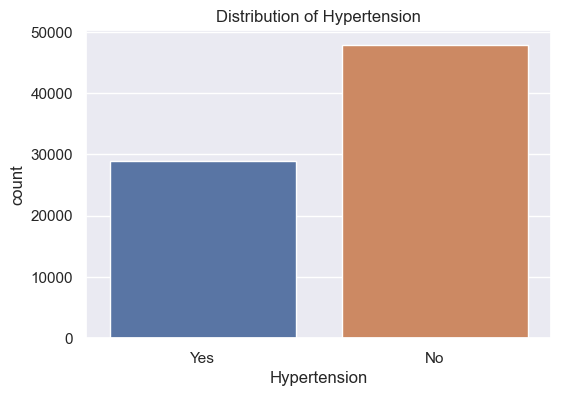

In [5]:
#Visualize the distribution of Hypertension
plt.figure(figsize=(6, 4))
ax = sb.countplot(x = "Hypertension", data = hypertension)
plt.title("Distribution of Hypertension")
plt.show()

### Data Analysis and Visualization: Numeric Variable

In [6]:
#Extrat numeric variables
hypertension_numeric = hypertension.select_dtypes(include=['float64'])

#Drop DROCDY3_, AVEDRNK3 and FRENCHF1 since we have created new numeric variables based on them
hypertension_numeric.drop(["DROCDY3_","AVEDRNK3","FRENCHF1"],inplace=True, axis=1)

/Users/wrx/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
hypertension_numeric.describe()

,_BMI5,FRUTDA2_,FTJUDA2_,VEGEDA2_,MENTHLTH,PHYSHLTH,_AGE80,AlchoIntake,FriesFreq
count,76825.000000,76825.000000,76825.000000,76825.000000,76825.000000,76825.000000,76825.000000,76825.000000,76825.000000
mean,28.074482,0.625683,0.111462,0.657195,3.563488,2.617716,54.482968,3.641245,0.173288
std,4.995847,0.349494,0.169943,0.329971,7.219229,6.709717,16.113892,3.819760,0.147149
min,13.900000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000
25%,24.410000,0.290000,0.000000,0.430000,0.000000,0.000000,42.000000,0.840000,0.066667
50%,27.440000,0.570000,0.020000,0.710000,0.000000,0.000000,56.000000,2.030000,0.142857
75%,31.190000,1.000000,0.140000,1.000000,3.000000,1.000000,68.000000,5.600000,0.285714
max,41.950000,1.830000,0.710000,1.830000,30.000000,30.000000,80.000000,15.680000,0.600000


**Uni-variate Visualization**
- After computing the statistical summary, now we would like to plot graphs for individual numeric variables. This allows us to convert complex statistical information in a simple, easy-to-understand format. 
- By presenting data visually, it can be easier for us to grasp key insights and take action based on the data.

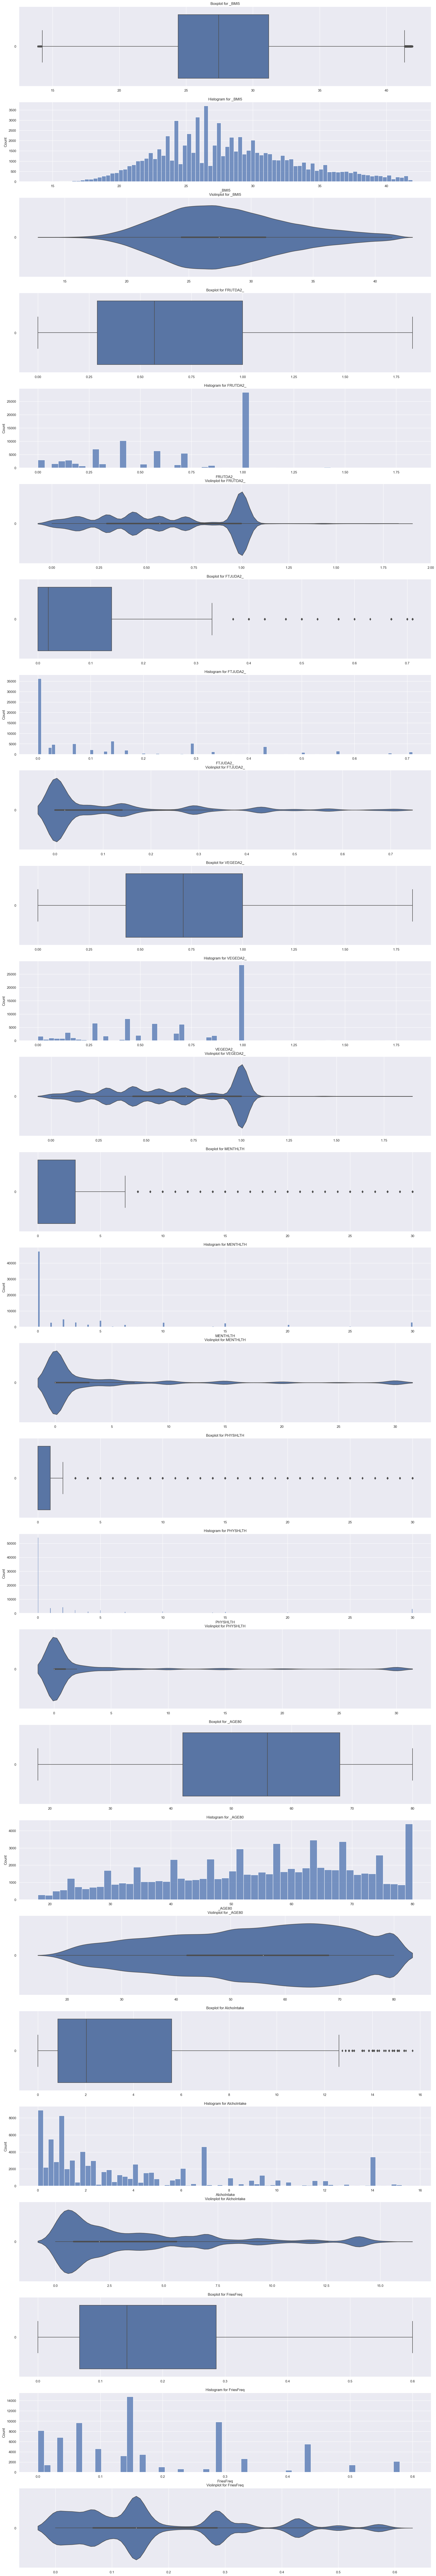

In [8]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(27, 1, figsize=(24, 150)) 

# Plot the basic uni-variate figures for each numeric variable
numeric_vars = ['_BMI5', 'FRUTDA2_', 'FTJUDA2_', 'VEGEDA2_', 'MENTHLTH', 'PHYSHLTH', '_AGE80', 'AlchoIntake', 'FriesFreq']
count=0
for var in numeric_vars:
    boxplot = sb.boxplot(data = hypertension[var], orient = "h", ax = axes[count]).set(title=f'Boxplot for {var}')
    histplot = sb.histplot(data = hypertension[var], ax = axes[count+1]).set(title=f'Histogram for {var}')
    violinplot = sb.violinplot(data = hypertension[var], orient = "h", ax = axes[count+2]).set(title=f'Violinplot for {var}')    
    count+=3
 

#### Bi-variate Visualization
- The next step involves identifying numeric variables that have strong relationships with the response variable, i.e., hypertension. To do so, we have utilized boxplot, with hypertension being the y-axis and numeric variable being the x-axis.

- Boxplots are a useful visualization tool in identifying the relationship between independent numeric variables and a dependent categorical variable because they provide a graphical representation of the distribution of the numeric variable for each category of the categorical variable.

- Boxplots display the median, quartiles, and extreme values (outliers) of a numeric variable for each category of a categorical variable. This enables comparison of the distribution of the numeric variable across different categories of the categorical variable.

[Text(0.5, 1.0, 'BMI'), Text(0.5, 0, '_BMI5'), Text(0, 0.5, 'Hypertension')]

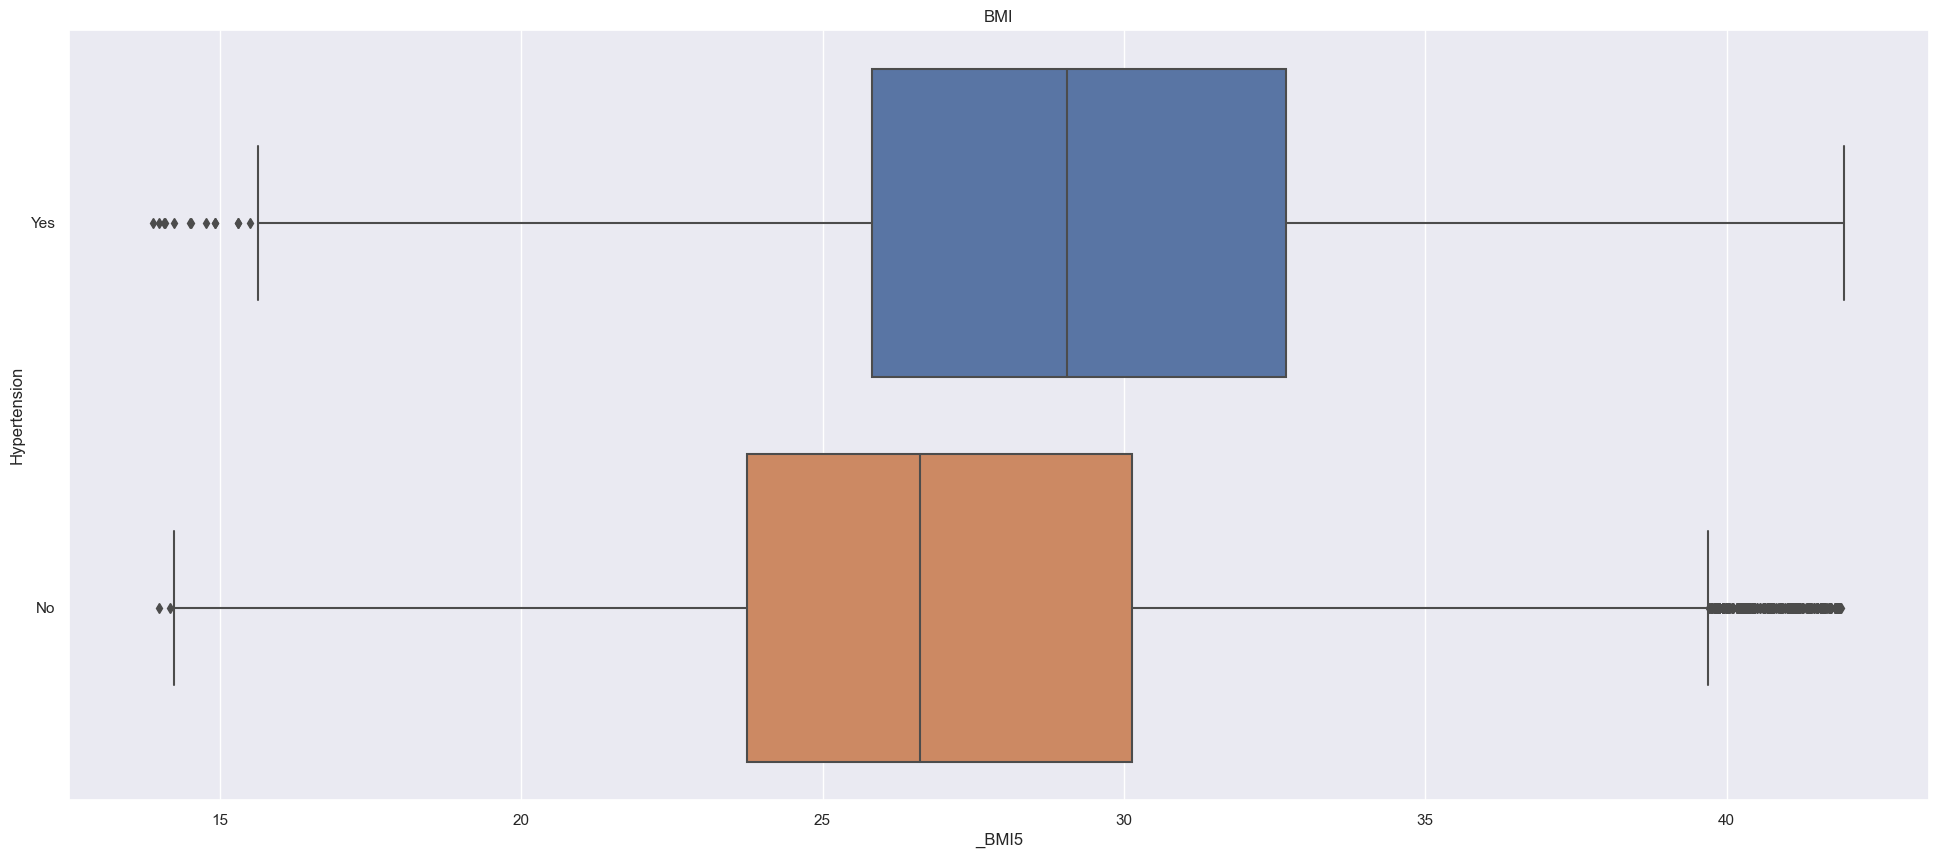

In [9]:
%matplotlib inline
f = plt.figure(figsize=(24,10))
sb.boxplot(x=hypertension["_BMI5"], y=hypertension["Hypertension"]).set(
    title="BMI", 
    xlabel='_BMI5',
    ylabel='Hypertension')

**Interpretation of the Plot**</br>
From the boxplot, it is evident that the distribution of `_BMI5` is different for different categories of `hypertension`. When `hypertension` is yes, the median, first quartile and third quartile are higher than the distribution of hypertension = No. Thus, there is a strong relationship between BMI and hypertension.

[Text(0.5, 1.0, 'Alcoholic Beverages Consumed Per Week'),
 Text(0.5, 0, 'AlchoIntake'),
 Text(0, 0.5, 'Hypertension')]

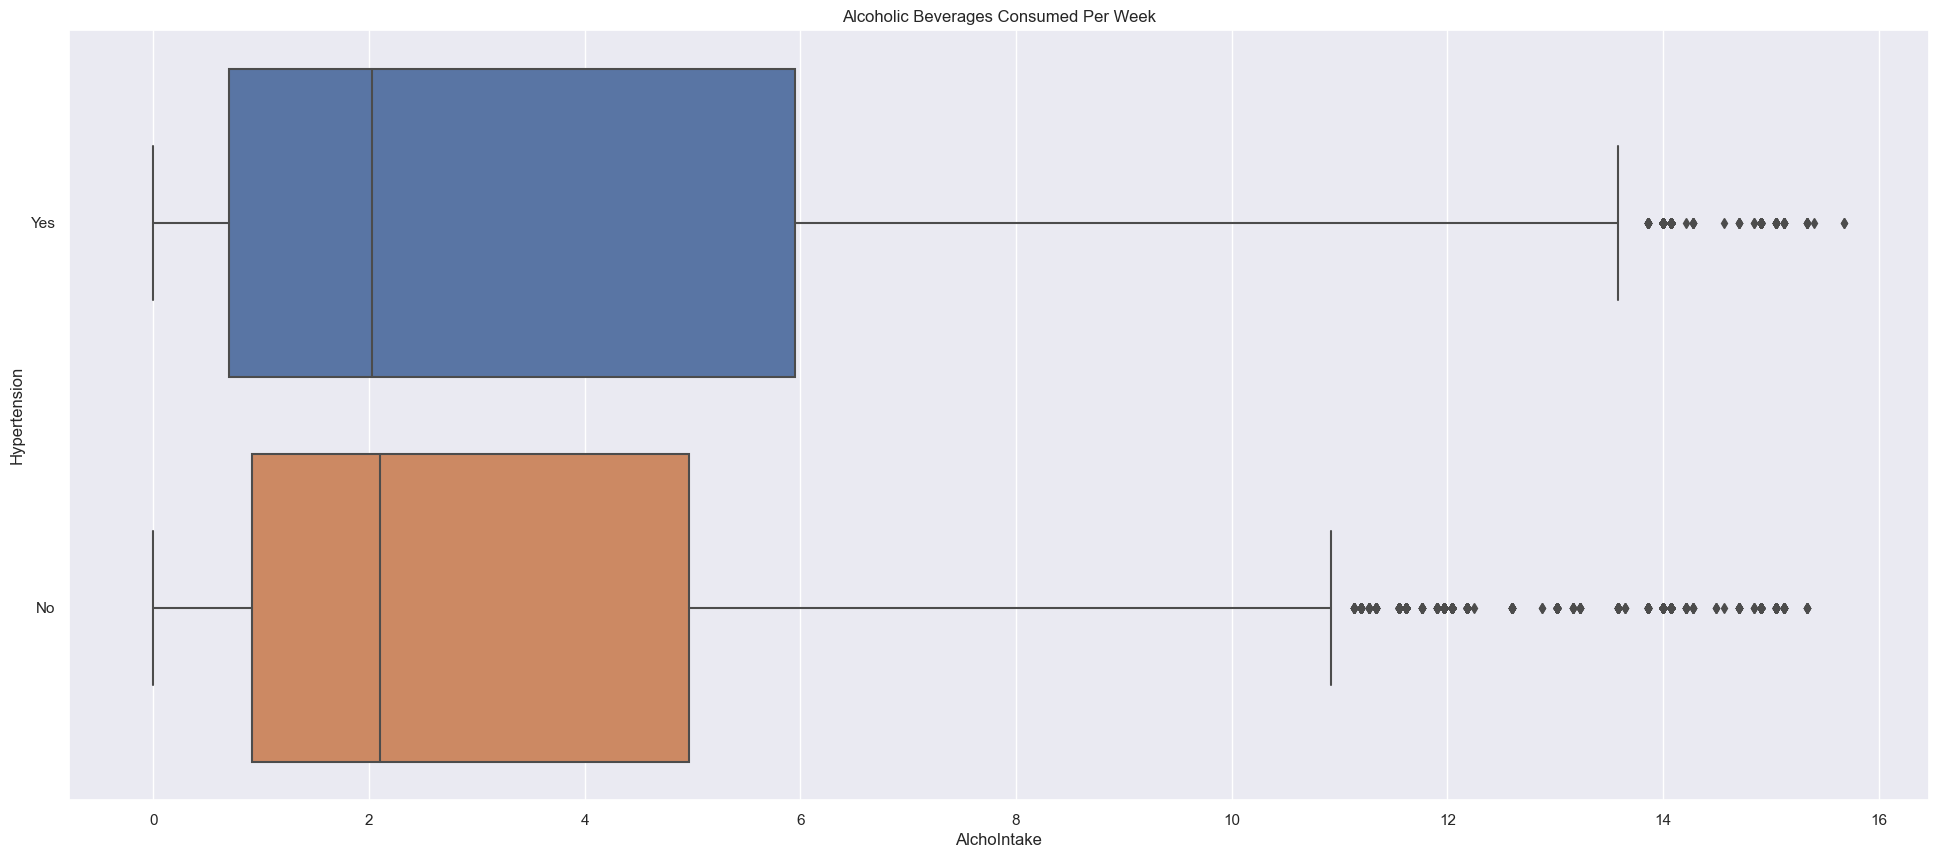

In [10]:
f = plt.figure(figsize=(24,10))
sb.boxplot(x=hypertension["AlchoIntake"], y=hypertension["Hypertension"]).set(
    title="Alcoholic Beverages Consumed Per Week", 
    xlabel='AlchoIntake',
    ylabel='Hypertension')

**Interpretation of the Plot**</br>
From the boxplot, the distribution of `AlchoInake` is similar for different categories of `hypertension`. When `hypertension` is yes, the third quartile of `AlchoIntake` is higher and the first quartile is lower. However, there does not seem to be a clear relationship between weekly alcohol intake and hypertension.

[Text(0.5, 1.0, 'Frequency of French Fry Consumption'),
 Text(0.5, 0, 'FriesFreq'),
 Text(0, 0.5, 'Hypertension')]

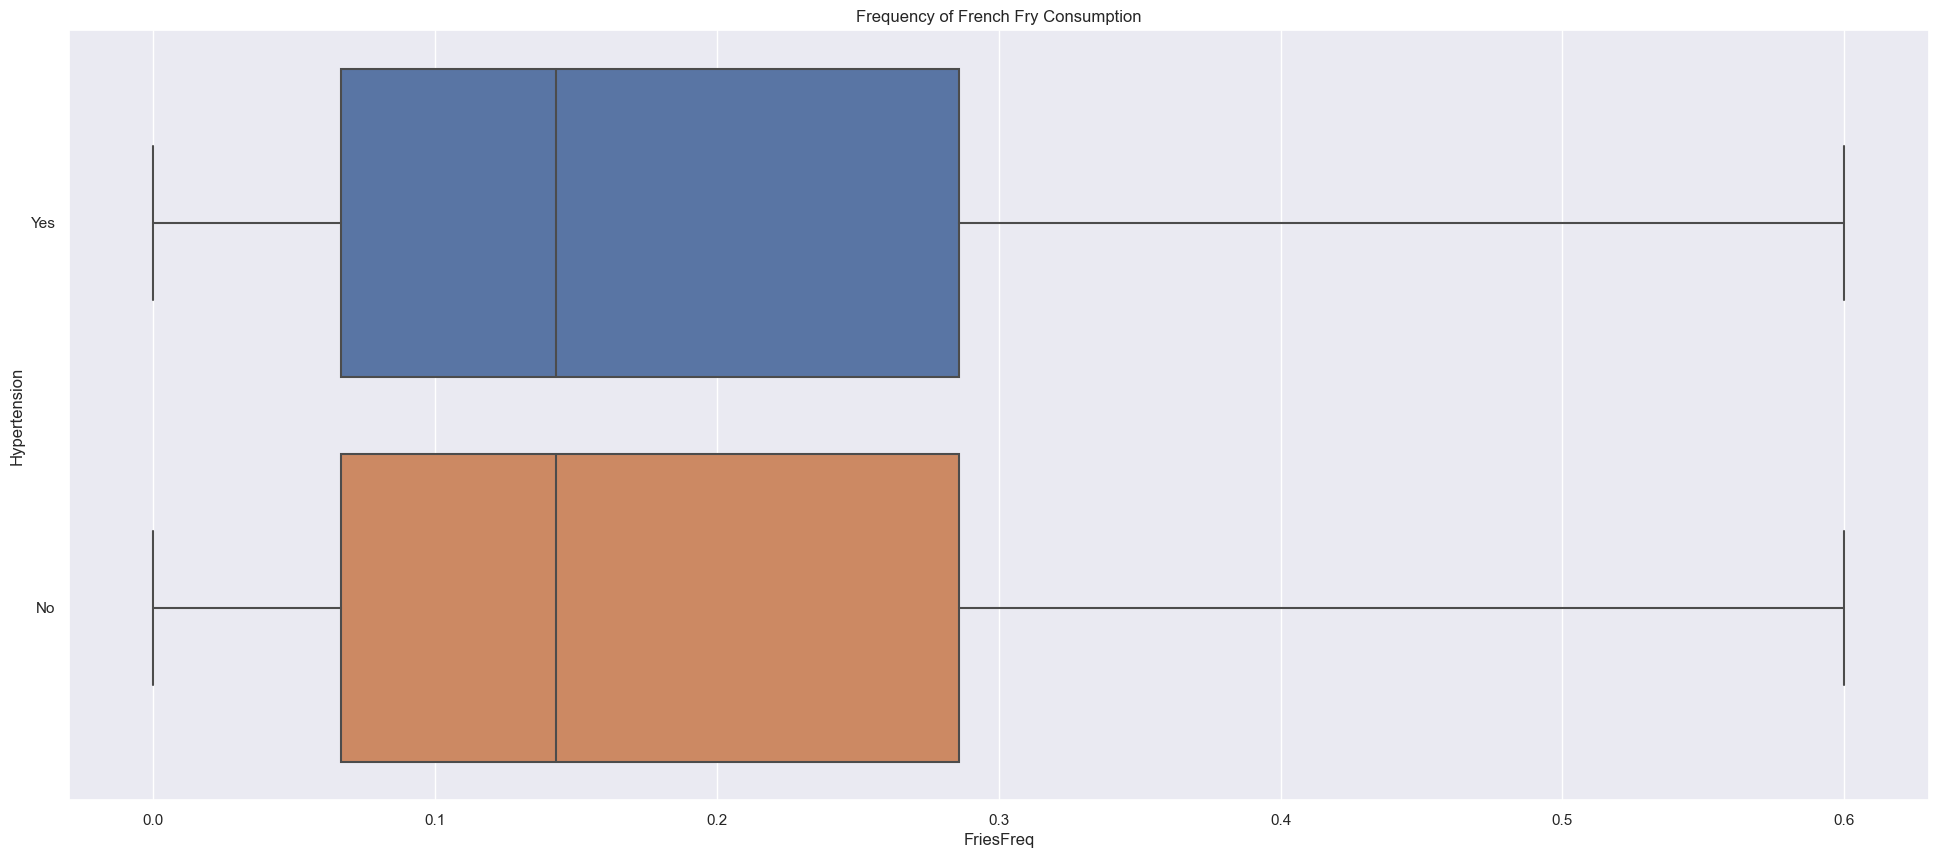

In [11]:
f = plt.figure(figsize=(24,10))
sb.boxplot(x=hypertension["FriesFreq"], y=hypertension["Hypertension"]).set(
    title="Frequency of French Fry Consumption", 
    xlabel='FriesFreq',
    ylabel='Hypertension')

**Interpretation of the Plot**</br>
From the boxplot, the distribution of `FriesFreq` is the same for different categories of `hypertension`. This indicates that there is no relationship between frequency of french fries consumption and hypertension.

[Text(0.5, 1.0, 'Fruit Intake in Times Per Day'),
 Text(0.5, 0, 'FRUTDA2_'),
 Text(0, 0.5, 'Hypertension')]

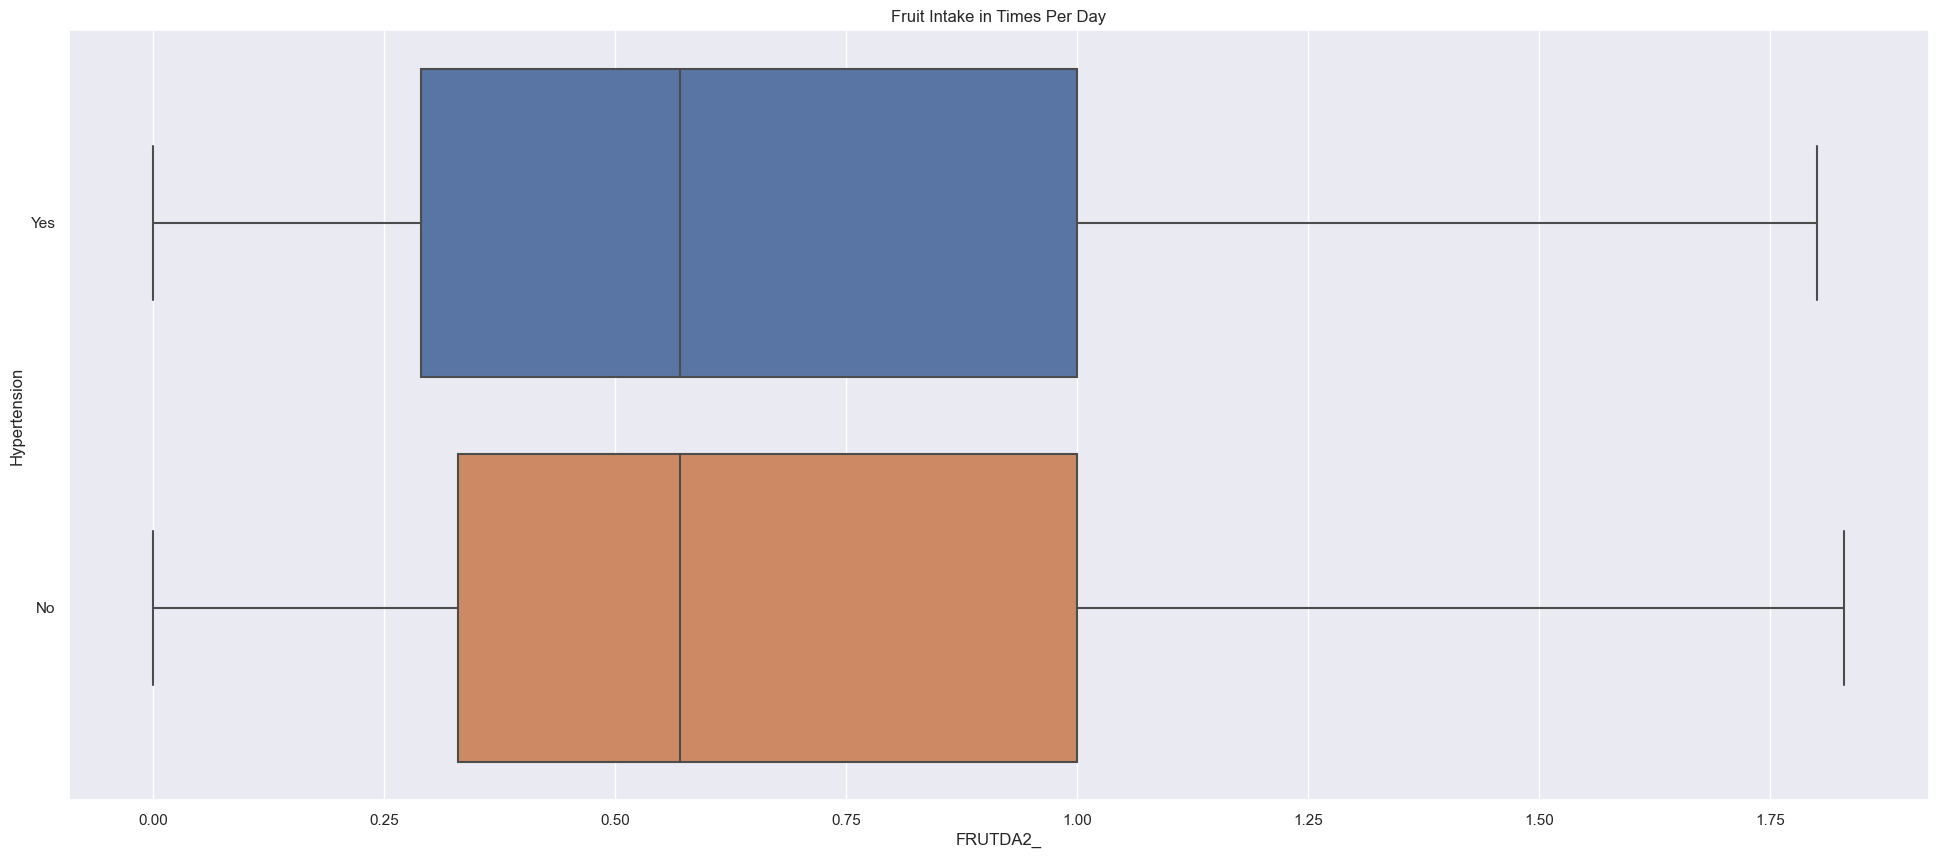

In [12]:
f = plt.figure(figsize=(24,10))
sb.boxplot(x=hypertension["FRUTDA2_"], y=hypertension["Hypertension"]).set(
    title="Fruit Intake in Times Per Day", 
    xlabel='FRUTDA2_',
    ylabel='Hypertension')

**Interpretation of the Plot**</br>
From the boxplot, the distribution of `FRUTDA2_` is similar for different categories of `hypertension`. When `hypertension` is yes, the first quartile of `FRUTDA2_` is lower. However, there does not seem to be a clear relationship between daily fruit intake and hypertension.

[Text(0.5, 1.0, 'Fruit Juice Intake in Times Per Day'),
 Text(0.5, 0, 'FTJUDA2_'),
 Text(0, 0.5, 'Hypertension')]

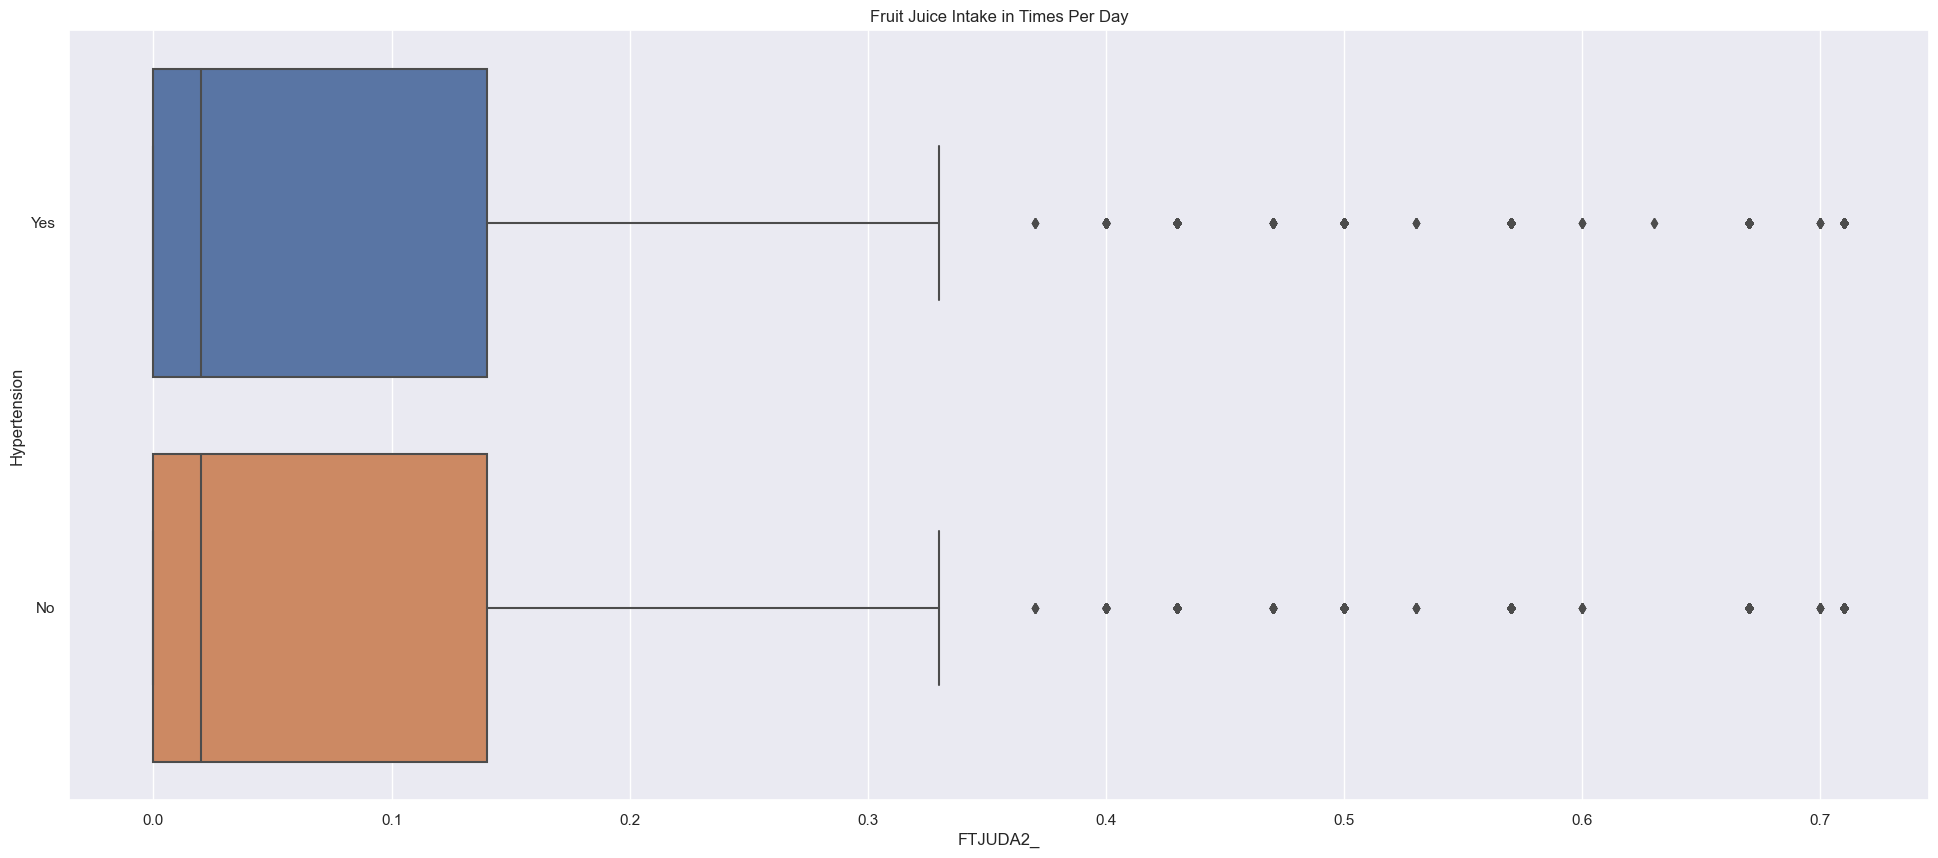

In [13]:
f = plt.figure(figsize=(24,10))
sb.boxplot(x=hypertension["FTJUDA2_"], y=hypertension["Hypertension"]).set(
    title="Fruit Juice Intake in Times Per Day", 
    xlabel='FTJUDA2_',
    ylabel='Hypertension')

**Interpretation of the Plot**</br>
From the boxplot, the distribution of `FTJUDA2_` is the same for different categories of `hypertension`. This indicates that there is no relationship between daily fruit juice intake and hypertension.

[Text(0.5, 1.0, 'Vegetable Intake in Times Per Day '),
 Text(0.5, 0, 'VEGEDA2_'),
 Text(0, 0.5, 'Hypertension')]

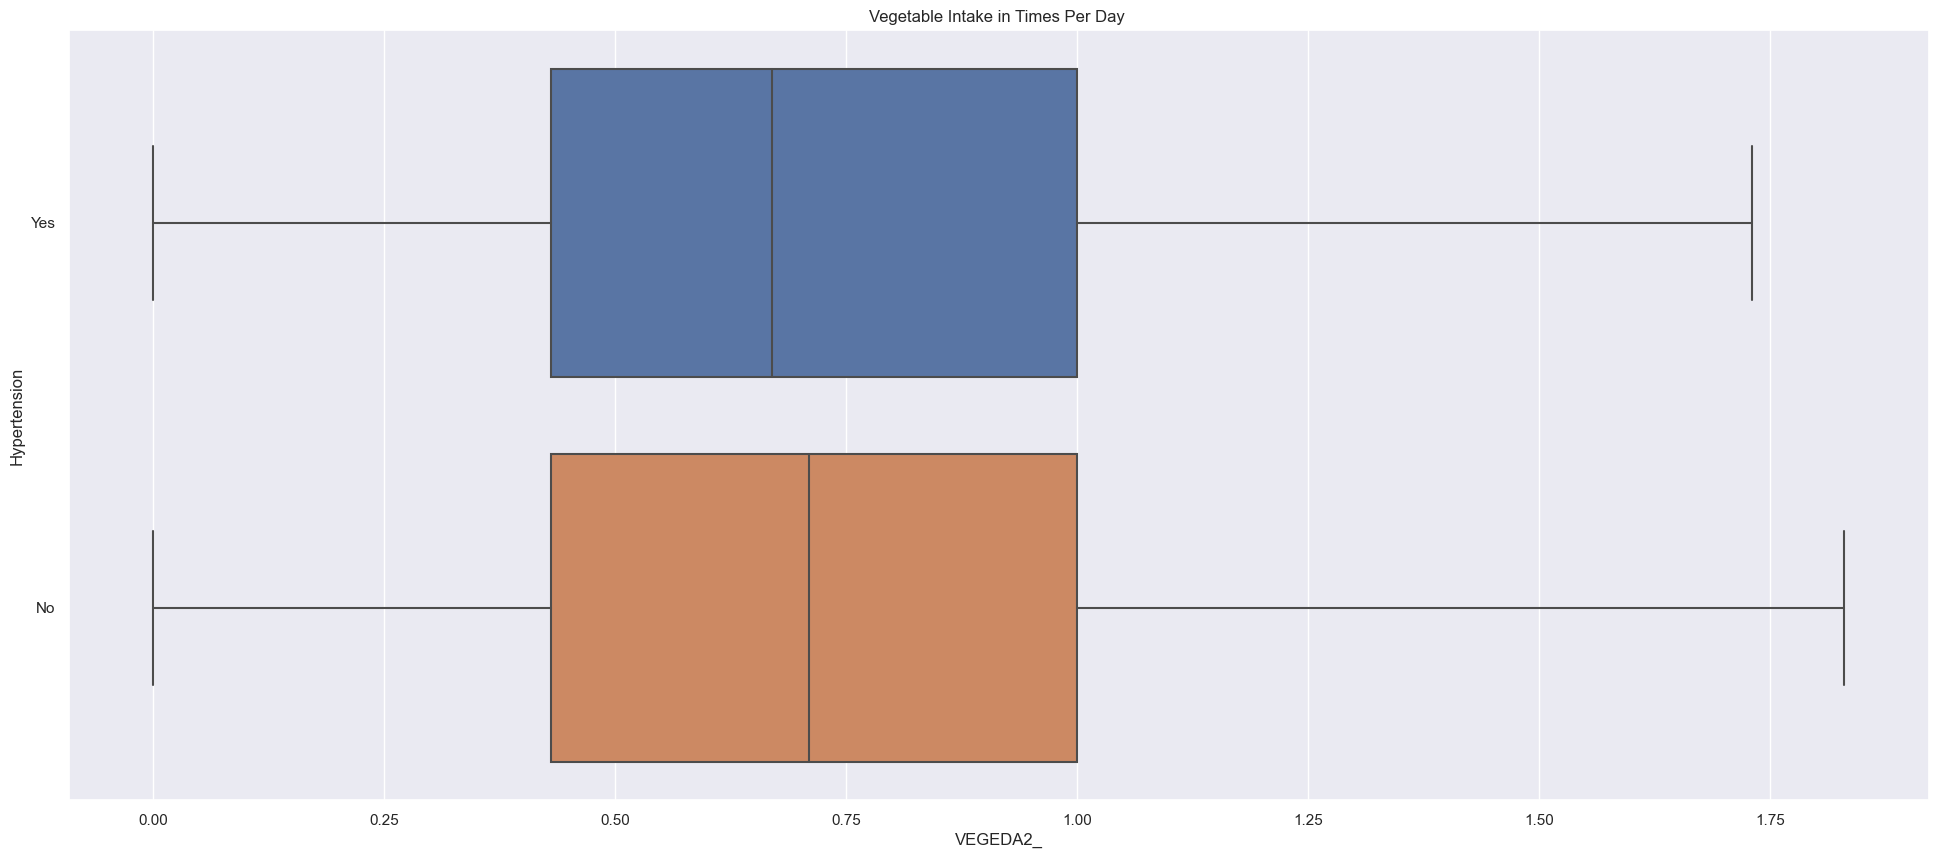

In [14]:
f = plt.figure(figsize=(24,10))
sb.boxplot(x=hypertension["VEGEDA2_"], y=hypertension["Hypertension"]).set(
    title="Vegetable Intake in Times Per Day ", 
    xlabel='VEGEDA2_',
    ylabel='Hypertension')

**Interpretation of the Plot**</br>
From the boxplot, the distribution of `VEGEDA2_` is similar for different categories of `hypertension`. When `hypertension` is yes, the median of the distribution is slightly lower. But in general, there is no clear relationship between daily vegetable intake and hypertension.

[Text(0.5, 1.0, 'No. of Days with Bad Mental Health in Last Month'),
 Text(0.5, 0, 'MENTHLTH'),
 Text(0, 0.5, 'Hypertension')]

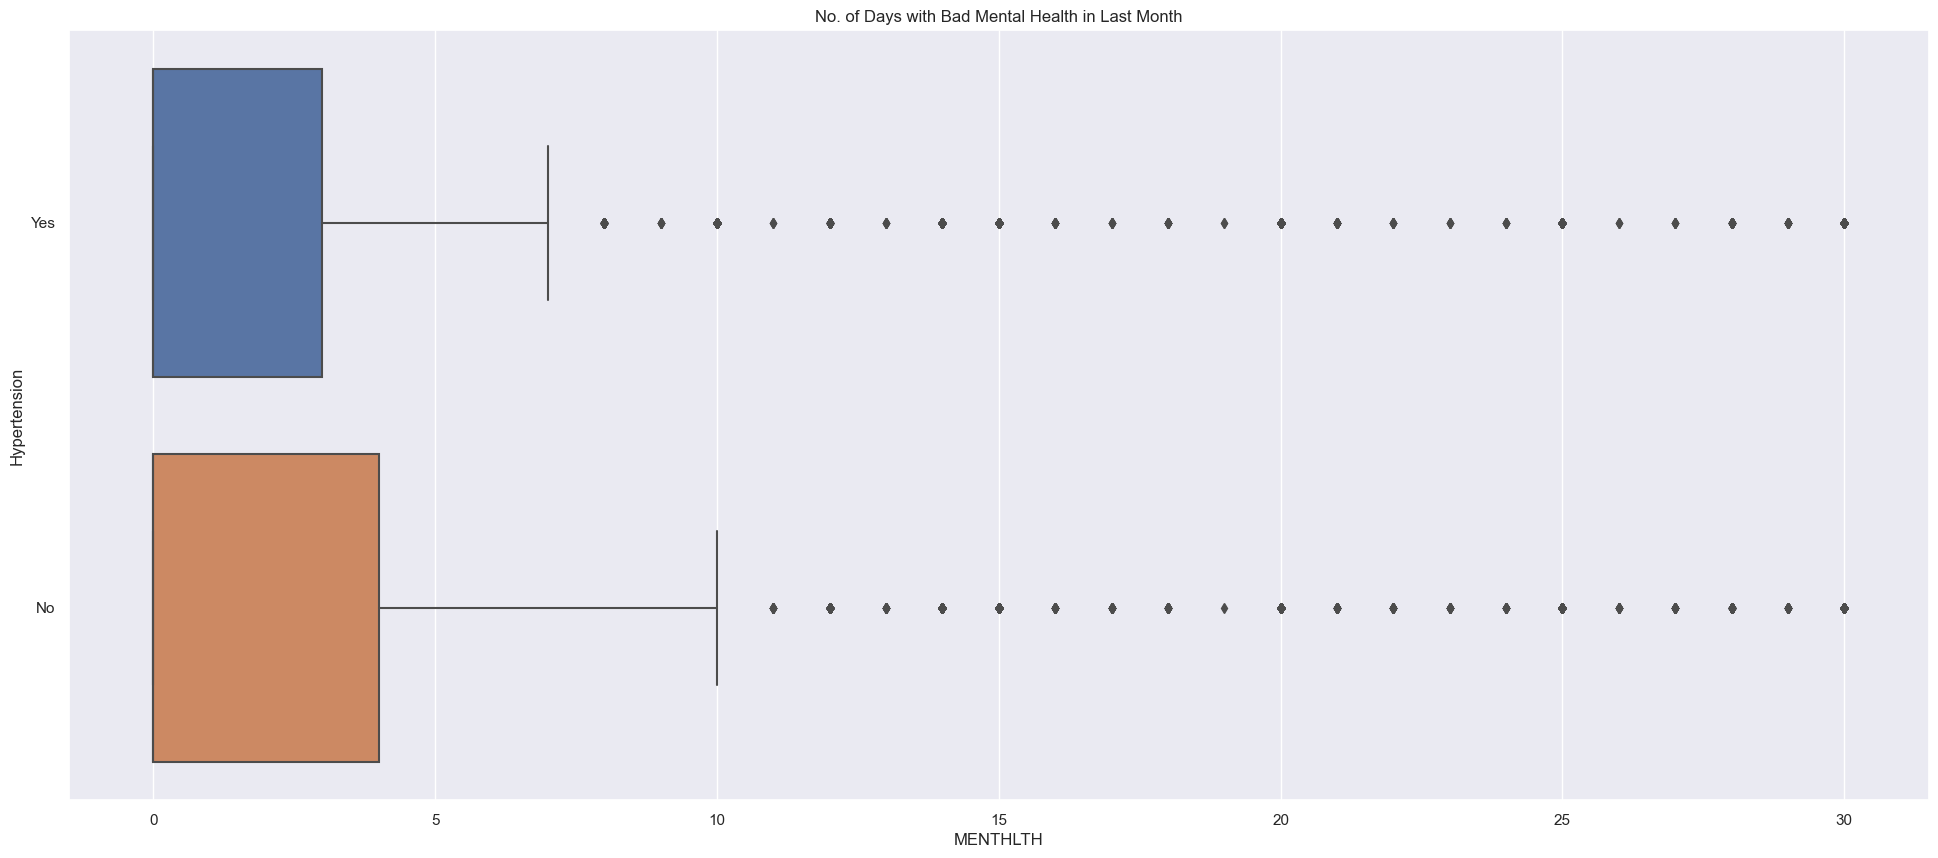

In [15]:
#should we change mental health to maybe categorical var?
f = plt.figure(figsize=(24,10))
sb.boxplot(x=hypertension["MENTHLTH"], y=hypertension["Hypertension"]).set(
    title="No. of Days with Bad Mental Health in Last Month", 
    xlabel='MENTHLTH',
    ylabel='Hypertension')

**Interpretation of the Plot**</br>
From the boxplot, the distribution of `MENTHLTH` varies slightly for different categories of `hypertension`. When `hypertension` is yes, the third quatile and the maximum value of the distribution is lower. But in general, there is no strong relationship between mental health and hypertension.

[Text(0.5, 1.0, 'No. of Days with Bad Physical Health in Last Month'),
 Text(0.5, 0, 'PHYSHLTH'),
 Text(0, 0.5, 'Hypertension')]

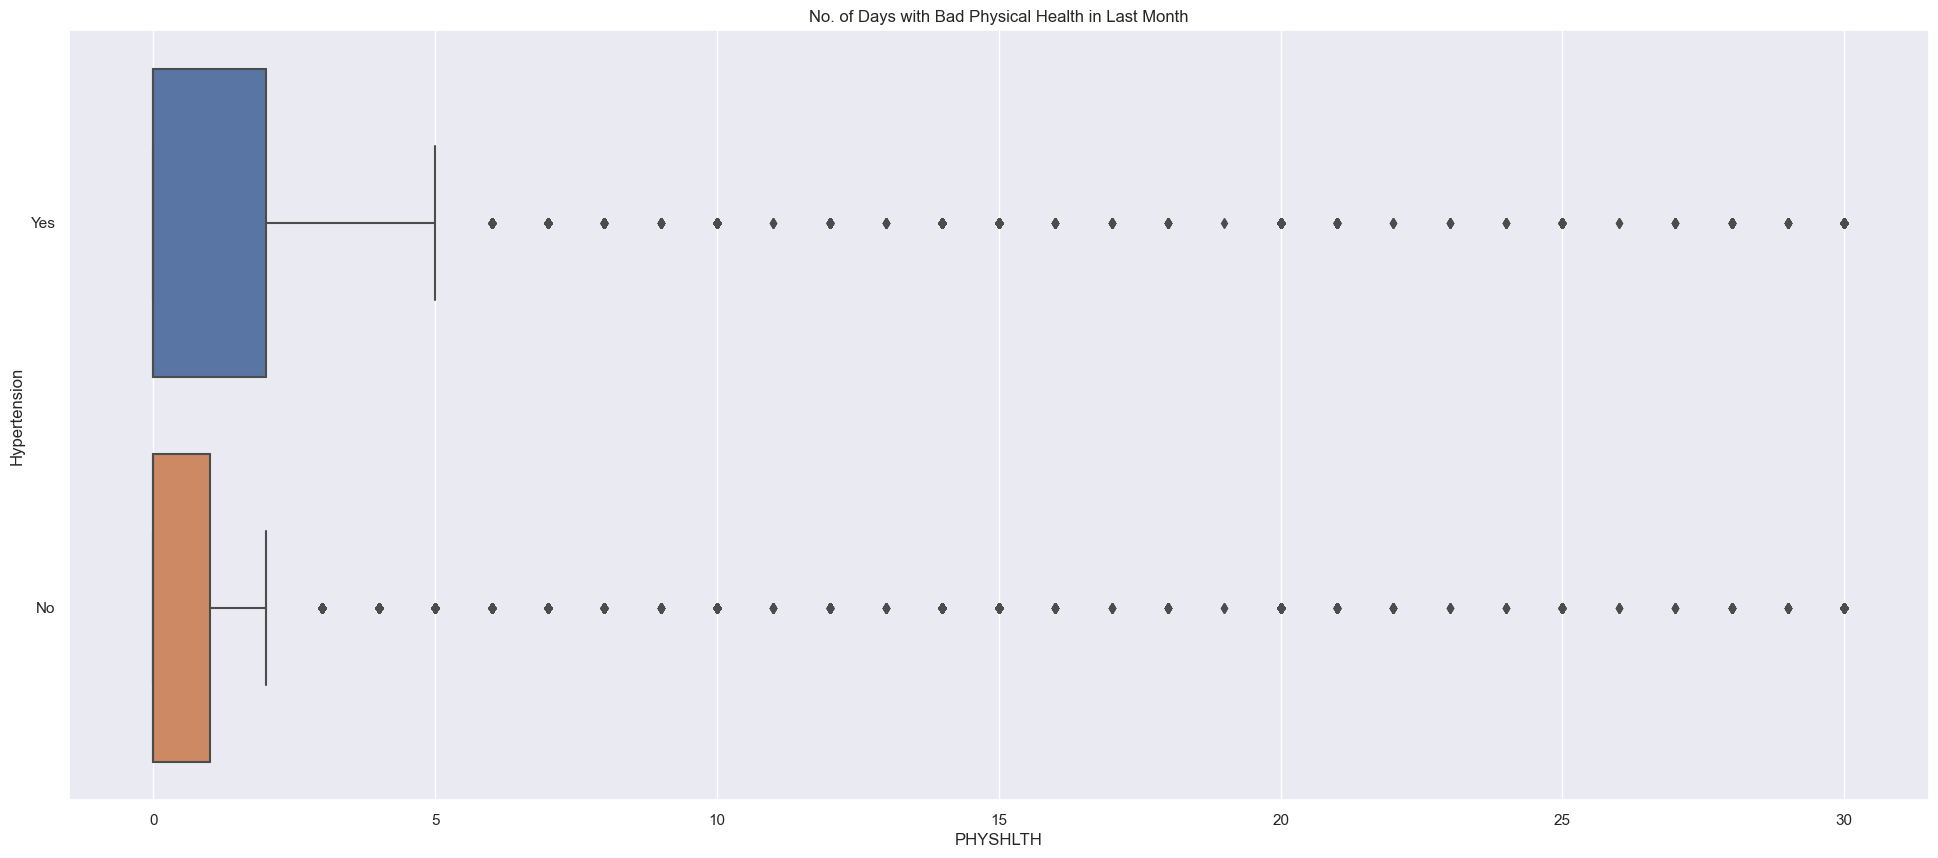

In [16]:
f = plt.figure(figsize=(24,10))
sb.boxplot(x=hypertension["PHYSHLTH"], y=hypertension["Hypertension"]).set(
    title="No. of Days with Bad Physical Health in Last Month", 
    xlabel='PHYSHLTH',
    ylabel='Hypertension')

**Interpretation of the Plot**</br>
From the boxplot, the distribution of `PHYSHLTH` varies for different categories of hypertension. When `hypertension` is yes, the third quatile and the maximum value of the distribution is significantly higher. Thus, we conclude that there is strong relationship between physical health and hypertension.

[Text(0.5, 1.0, 'Age'), Text(0.5, 0, '_AGE80'), Text(0, 0.5, 'Hypertension')]

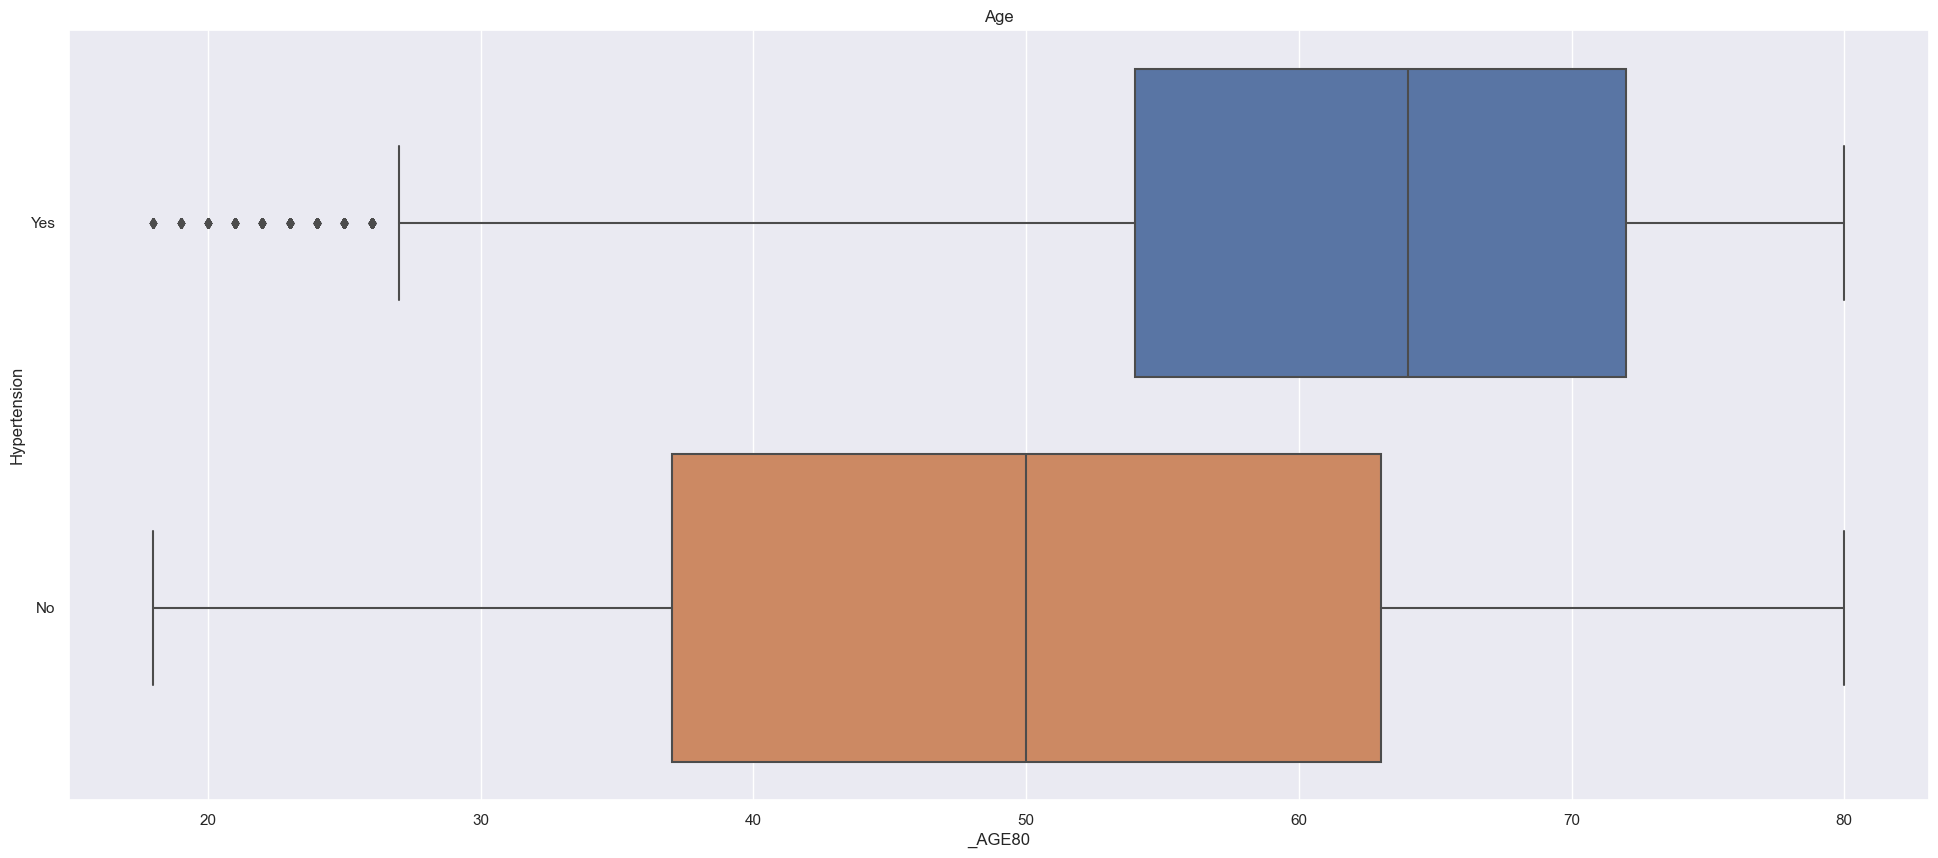

In [17]:
f = plt.figure(figsize=(24,10))
sb.boxplot(x=hypertension["_AGE80"], y=hypertension["Hypertension"]).set(
    title="Age", 
    xlabel='_AGE80',
    ylabel='Hypertension')

**Interpretation of the Plot**</br>
From the boxplot, it is evident that the distribution of `_Age80` varies drastically for different categories of `hypertension`. When `hypertension` is yes, the entire distribution are significantly higher. Thus, there is a very strong relationship between Age and hypertension.

#### Summary of Findings
Based on the boxplots, the following numeric variables are identified to have close relationship with hypertension:
1. `_BMI5`
2. `AlchoIntake`
3. `PHYSHLTH`
4. `_AGE80`

Thus, they will be used as predictor variables for our machine learning models.

### Data Analysis and Visualization: Categorical Variable

**Uni-variate Visualization**
- To better visualize the distribution of individual categorical variable, a count plot is done on each variable. 
- Count plot is a useful visualization tool for visualizing a categorical variable because it provides a simple and intuitive way to display the distribution of observations within each category of the variable.
- It displays the count of observations in each category of a categorical variable as a bar graph. 

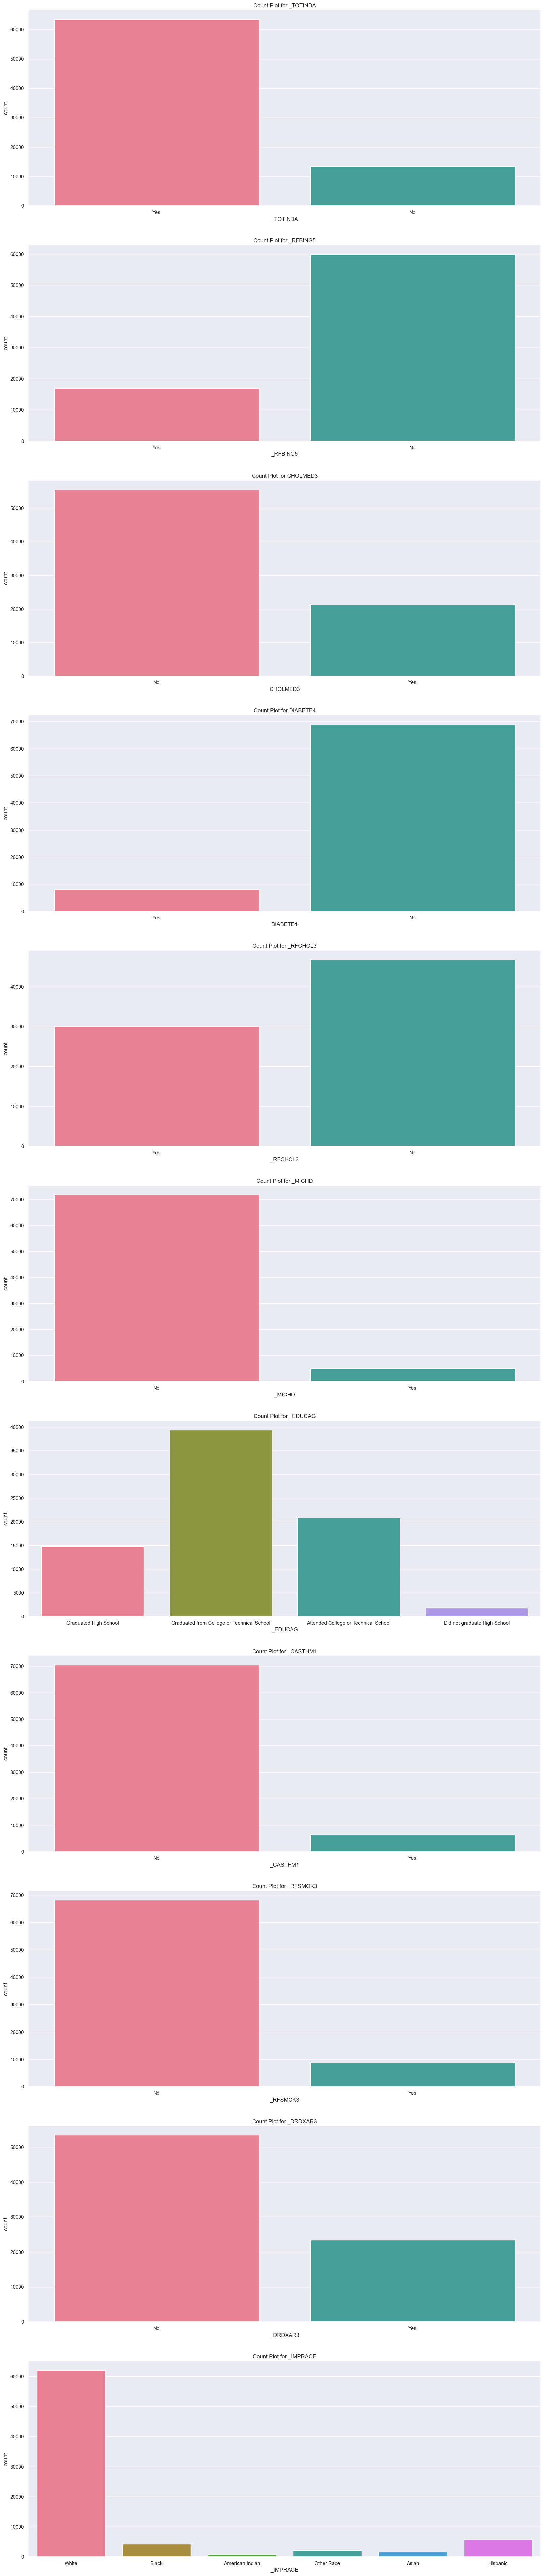

In [18]:
f, axes = plt.subplots(11, 1, figsize=(20, 100)) 
categorical_var = ['_TOTINDA','_RFBING5','CHOLMED3','DIABETE4','_RFCHOL3','_MICHD','_EDUCAG','_CASTHM1','_RFSMOK3','_DRDXAR3','_IMPRACE']

count = 0
for var in categorical_var:
    sb.countplot(data = hypertension , x=var, palette='husl', ax=axes[count]).set(title=f'Count Plot for {var}')
    count+=1

#### Bi-variate Visualization
- Besides numeric variables, we also need to identify categorical variables that have strong relationships with the response variable, i.e., hypertension. To do so, we would use catplots.

- Catplot is a useful visualization tool in identifying the relationship between independent categorical variables and a dependent categorical variable, as they provide a clear visual representation of the distribution of the dependent variable across different categories of the independent variable, enabling comparison and identification of patterns or relationships.

Text(0.5, 0.98, 'Physical Activity in Last Month (Y/N)')

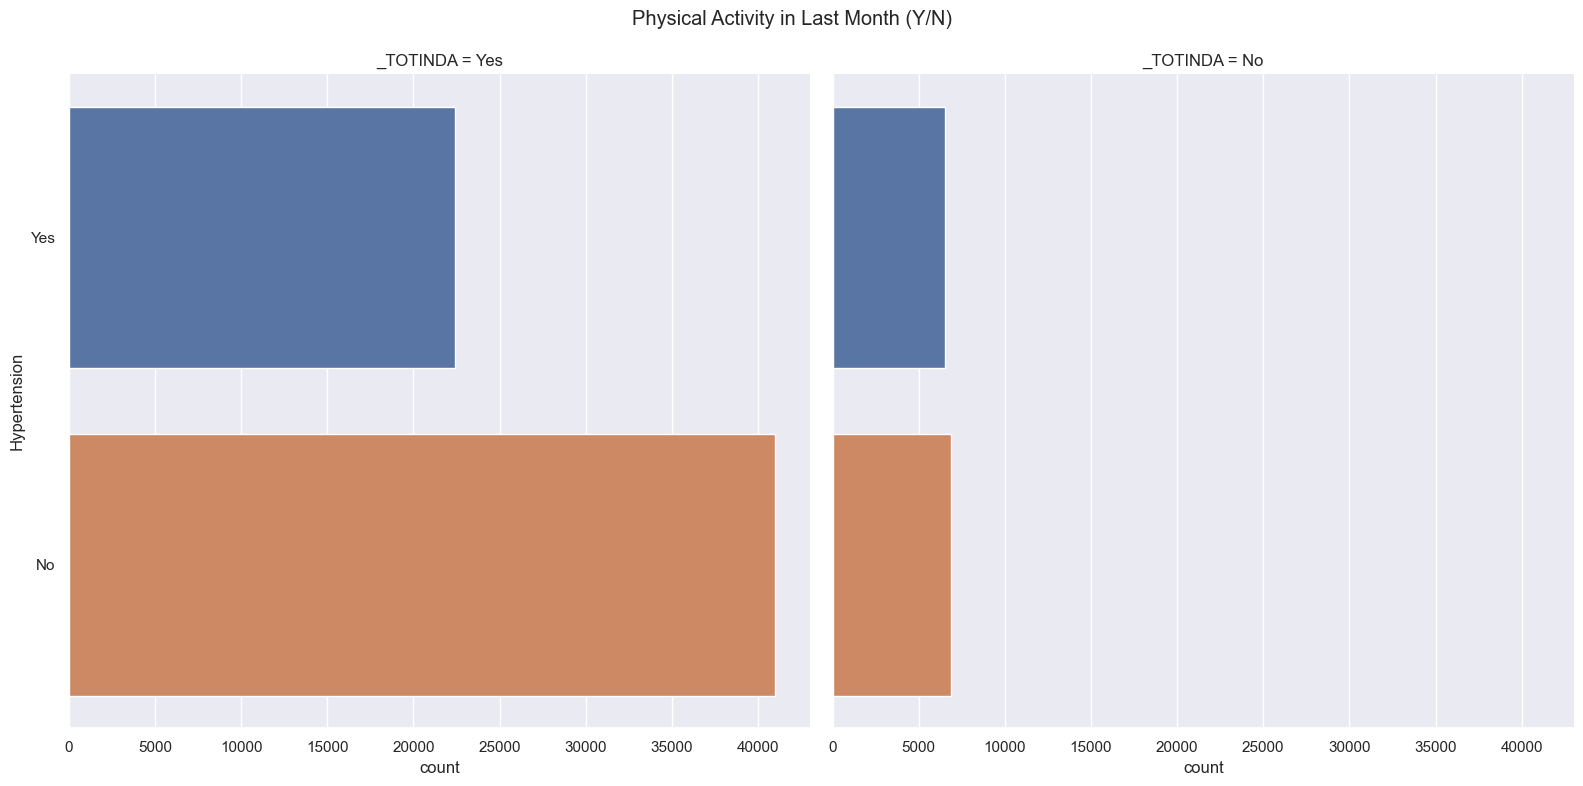

In [19]:
catplot = sb.catplot(y = 'Hypertension', data = hypertension, col = '_TOTINDA', kind = 'count', col_wrap = 2, height = 8)
catplot.fig.subplots_adjust(top=0.9)
catplot.fig.suptitle('Physical Activity in Last Month (Y/N)')

**Interpretation of the Plot**</br>
From the catplot, it is evident that the distribution of `hypertension` is different for different categories of `_TOTINDA`. When `_TOTINDA` is yes, there are more 'Yes' than 'No' for `hypertension`. But when `_TOTINDA` is no, there are slightly more 'No' than 'Yes'. Thus, there is a strong relationship between physical activities and hypertension.

Text(0.5, 0.98, 'Binge drinkers (Y/N)')

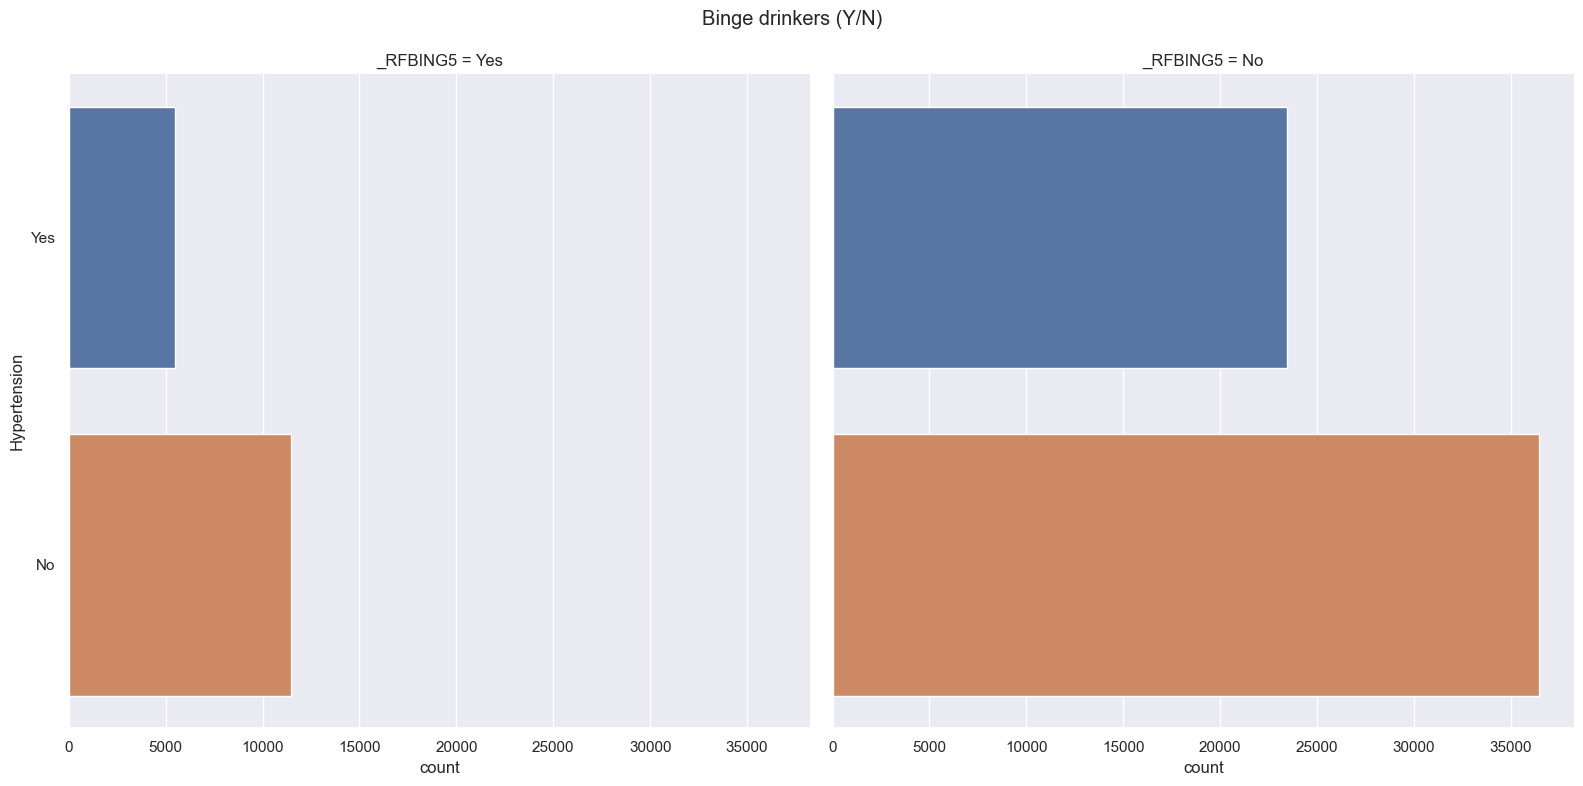

In [20]:
catplot = sb.catplot(y = 'Hypertension', data = hypertension, col = '_RFBING5', kind = 'count', col_wrap = 2, height = 8)
catplot.fig.subplots_adjust(top=0.9)
catplot.fig.suptitle('Binge drinkers (Y/N)')

**Interpretation of the Plot**</br>
From the catplot, the distribution of `hypertension` is similar for different categories of `_RFBING5`. Thus, there is no close relationship between binge drinkers and hypertension.

Text(0.5, 0.98, 'Currently Taking Cholesterol Medication (Y/N)')

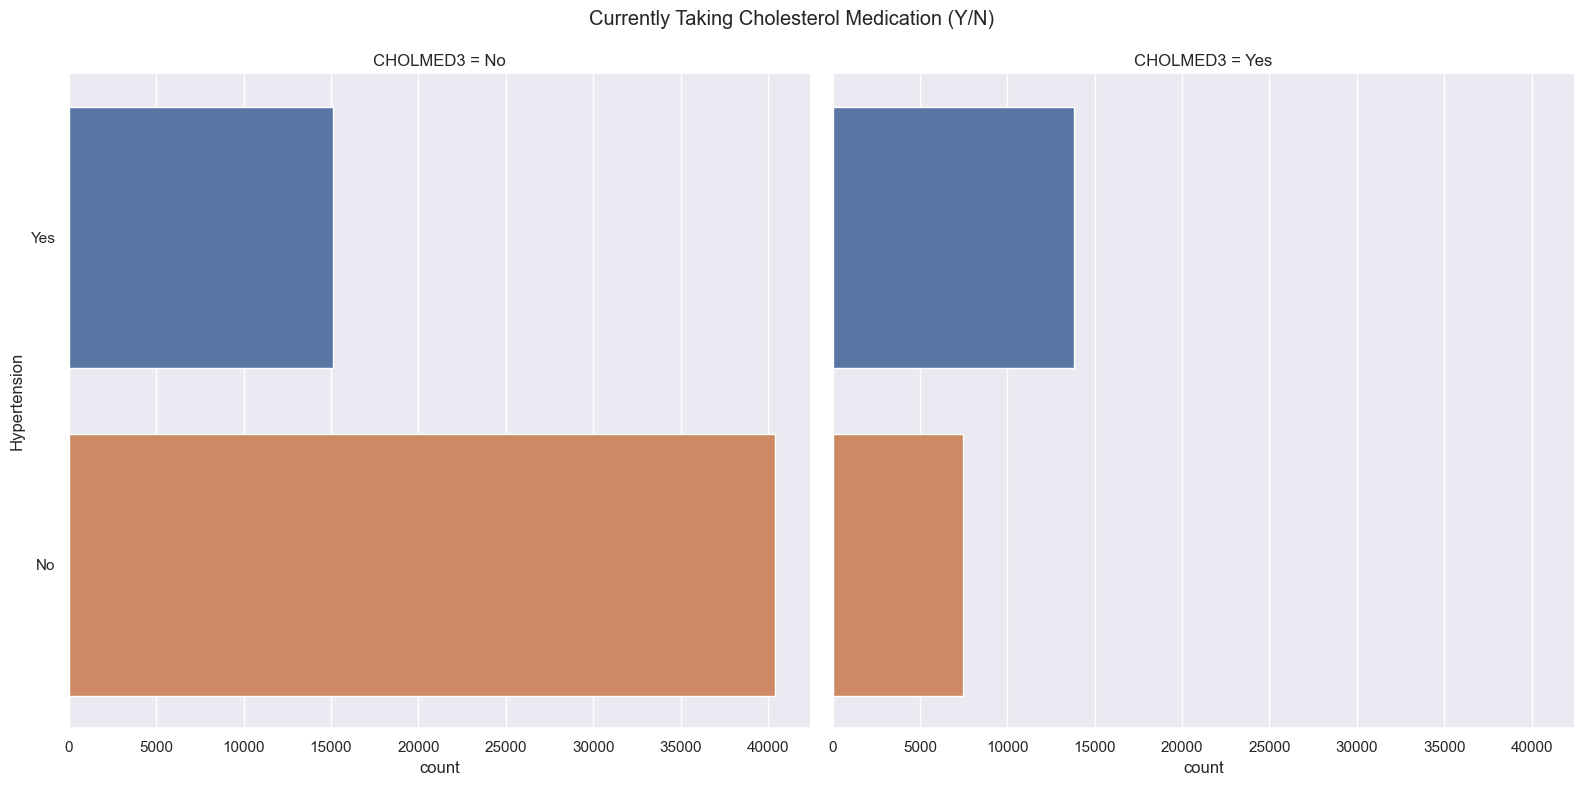

In [21]:
catplot = sb.catplot(y = 'Hypertension', data = hypertension, col = 'CHOLMED3', kind = 'count', col_wrap = 2, height = 8)
catplot.fig.subplots_adjust(top=0.9)
catplot.fig.suptitle('Currently Taking Cholesterol Medication (Y/N)')

**Interpretation of the Plot**</br>
From the catplot, it is evident that the distribution of `hypertension` is different for different categories of `CHOLMED3`. When `CHOLMED3` is yes, there are more 'Yes' than 'No' for `hypertension`. But when `CHOLMED3` is no, there are significantly more 'No' than 'Yes'. Thus, there is a strong relationship between cholesterol medication and hypertension.

Text(0.5, 0.98, 'Diagnosed with Diabetes (Y/N)')

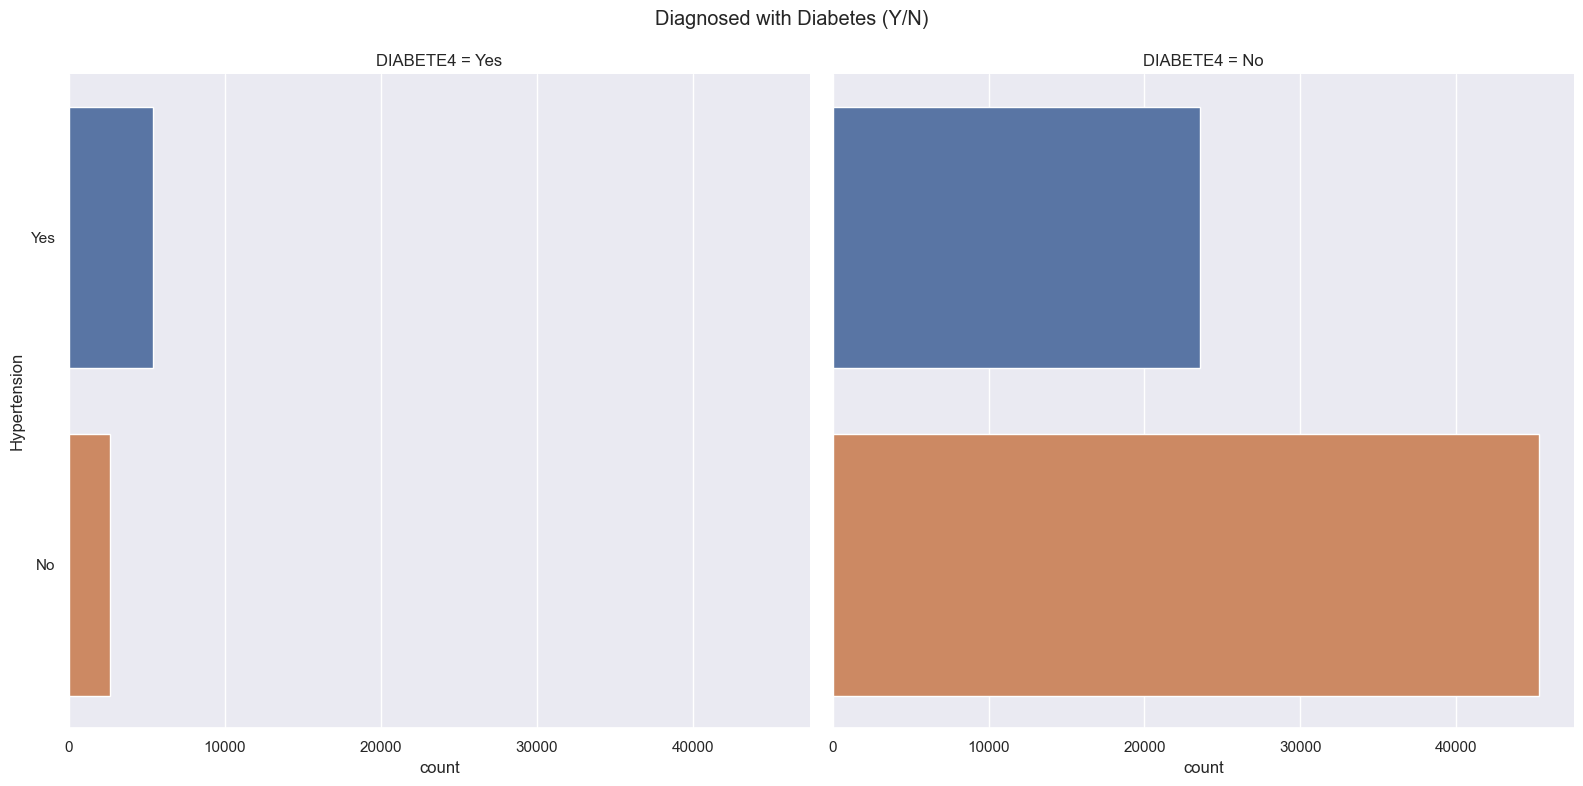

In [22]:
catplot = sb.catplot(y = 'Hypertension', data = hypertension, col = 'DIABETE4', kind = 'count', col_wrap = 2, height = 8)
catplot.fig.subplots_adjust(top=0.9)
catplot.fig.suptitle('Diagnosed with Diabetes (Y/N)')

**Interpretation of the Plot**</br>
From the catplot, it is evident that the distribution of `hypertension` is different for different categories of `DIABETE4`. When `DIABETE4` is yes, there are more 'Yes' than 'No' for `hypertension`. But when `DIABETE4` is no, there are significantly more 'No' than 'Yes'. Thus, there is a strong relationship between diabetes and hypertension.

Text(0.5, 0.98, 'Diagnosed with High Cholesterol (Y/N)')

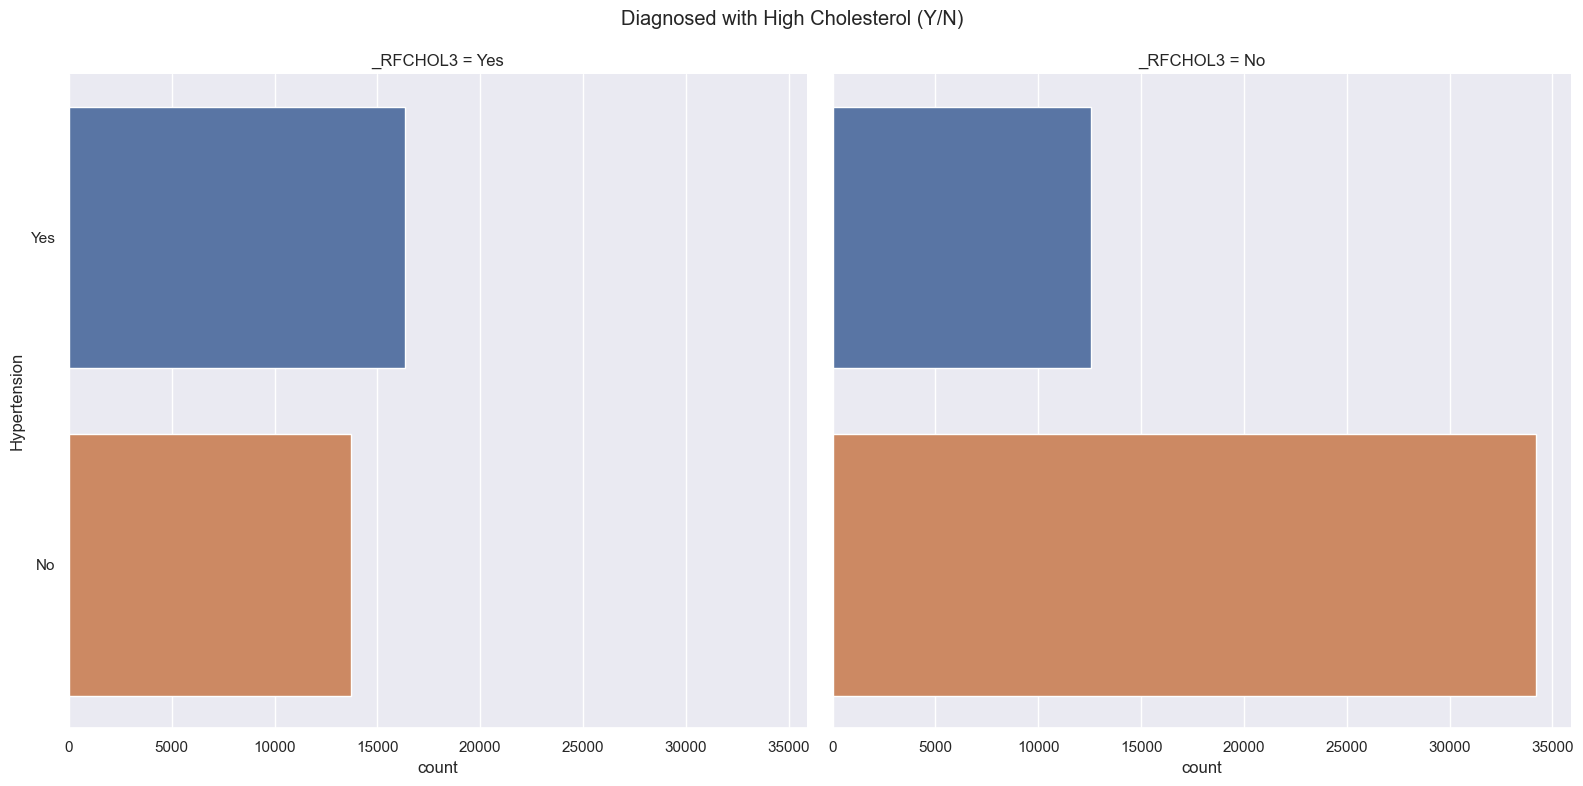

In [23]:
catplot = sb.catplot(y = 'Hypertension', data = hypertension, col = '_RFCHOL3', kind = 'count', col_wrap = 2, height = 8)
catplot.fig.subplots_adjust(top=0.9)
catplot.fig.suptitle('Diagnosed with High Cholesterol (Y/N)')

**Interpretation of the Plot**</br>
From the catplot, it is evident that the distribution of `hypertension` is different for different categories of `_RFCHOL3`. When `_RFCHOL3` is yes, there are slightly more 'Yes' than 'No' for `hypertension`. But when `_RFCHOL3` is no, there are significantly more 'No' than 'Yes'. Thus, there is a strong relationship between high cholesterol and hypertension.

Text(0.5, 0.98, 'Diagnosed with Coronary Heart Diseases (Y/N)')

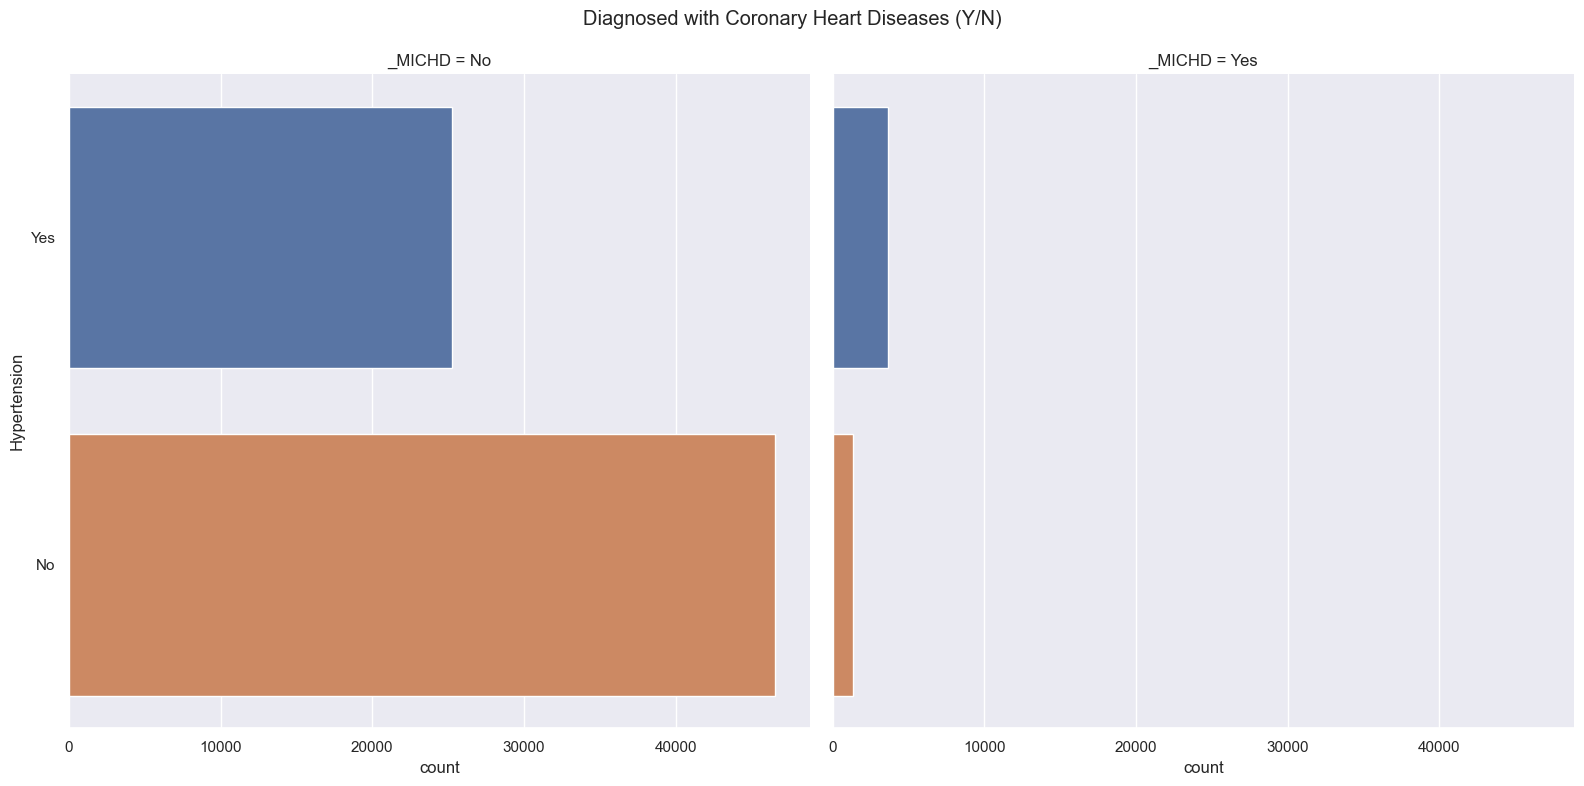

In [24]:
catplot = sb.catplot(y = 'Hypertension', data = hypertension, col = '_MICHD', kind = 'count', col_wrap = 2, height = 8)
catplot.fig.subplots_adjust(top=0.9)
catplot.fig.suptitle('Diagnosed with Coronary Heart Diseases (Y/N)')

**Interpretation of the Plot**</br>
From the catplot, it is evident that the distribution of `hypertension` is different for different categories of `_MICHD`. When `_MICHD` is yes, there are more 'Yes' than 'No' for `hypertension`. But when `_MICHD` is no, there are significantly more 'No' than 'Yes'. Thus, there is a strong relationship between coronary heart diseases and hypertension.

Text(0.5, 0.98, 'Level of Education Completed')

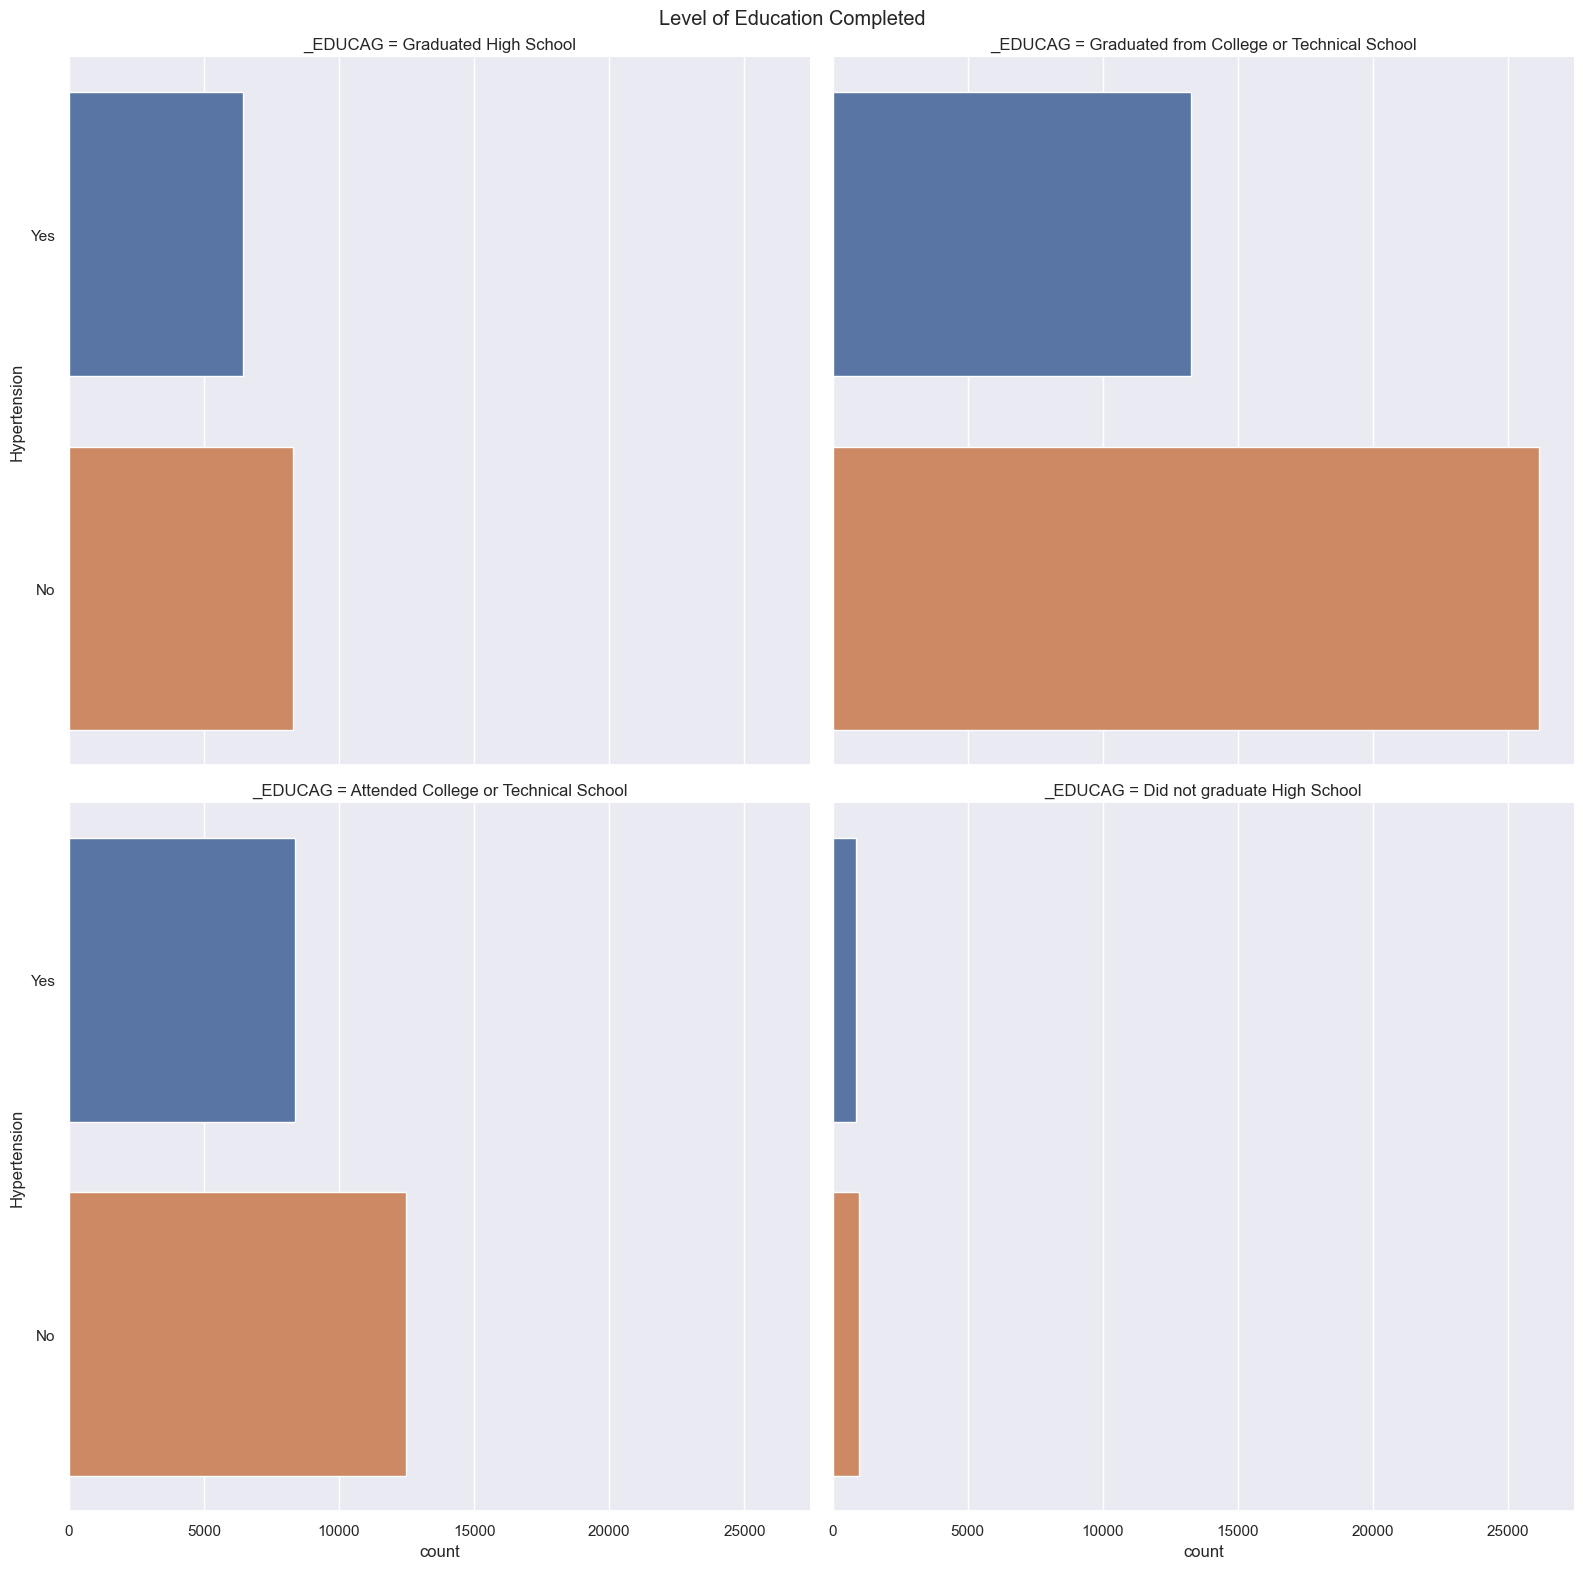

In [25]:
catplot = sb.catplot(y = 'Hypertension', data = hypertension, col = '_EDUCAG', kind = 'count', col_wrap = 2, height = 8)
catplot.fig.subplots_adjust(top=0.95)
catplot.fig.suptitle('Level of Education Completed')

**Interpretation of the Plot**</br>
From the catplot, it is evident that the distribution of `hypertension` is different for different categories of `_EDUCAG`. When `_EDUCAG` indicates higher education, e.g., grauated from high school or college, there are significantly more 'No' than 'Yes' for `hypertension`. But when `_EDUCAG` indicates lower education, e.g., attend technical school or did not graduate from high school, there are only slightly more 'No' than 'Yes'. Thus, there is a strong relationship between education level and hypertension.

Text(0.5, 0.98, 'Currently Have Asthma(Y/N)')

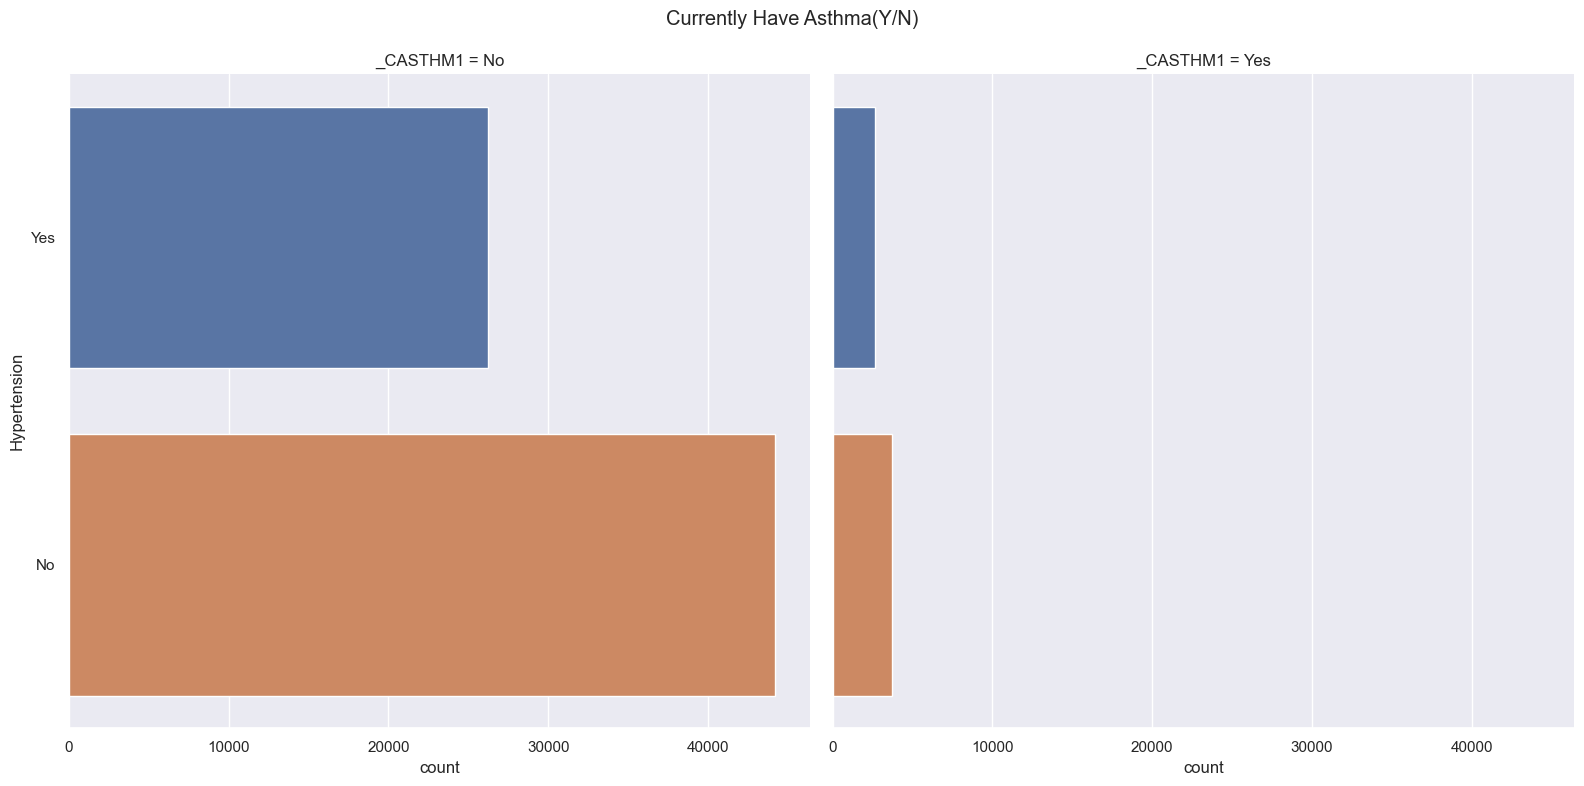

In [26]:
catplot = sb.catplot(y = 'Hypertension', data = hypertension, col = '_CASTHM1', kind = 'count', col_wrap = 2, height = 8)
catplot.fig.subplots_adjust(top=0.9)
catplot.fig.suptitle('Currently Have Asthma(Y/N)')

**Interpretation of the Plot**</br>
From the catplot, the distribution of `hypertension` is similar for different categories of `_CASTHM1`, albeit the difference is higher when `_CASTHM1` is "No". Thus, there is no close relationship between asthma history and hypertension.

Text(0.5, 0.98, 'Current Smokers (Y/N)')

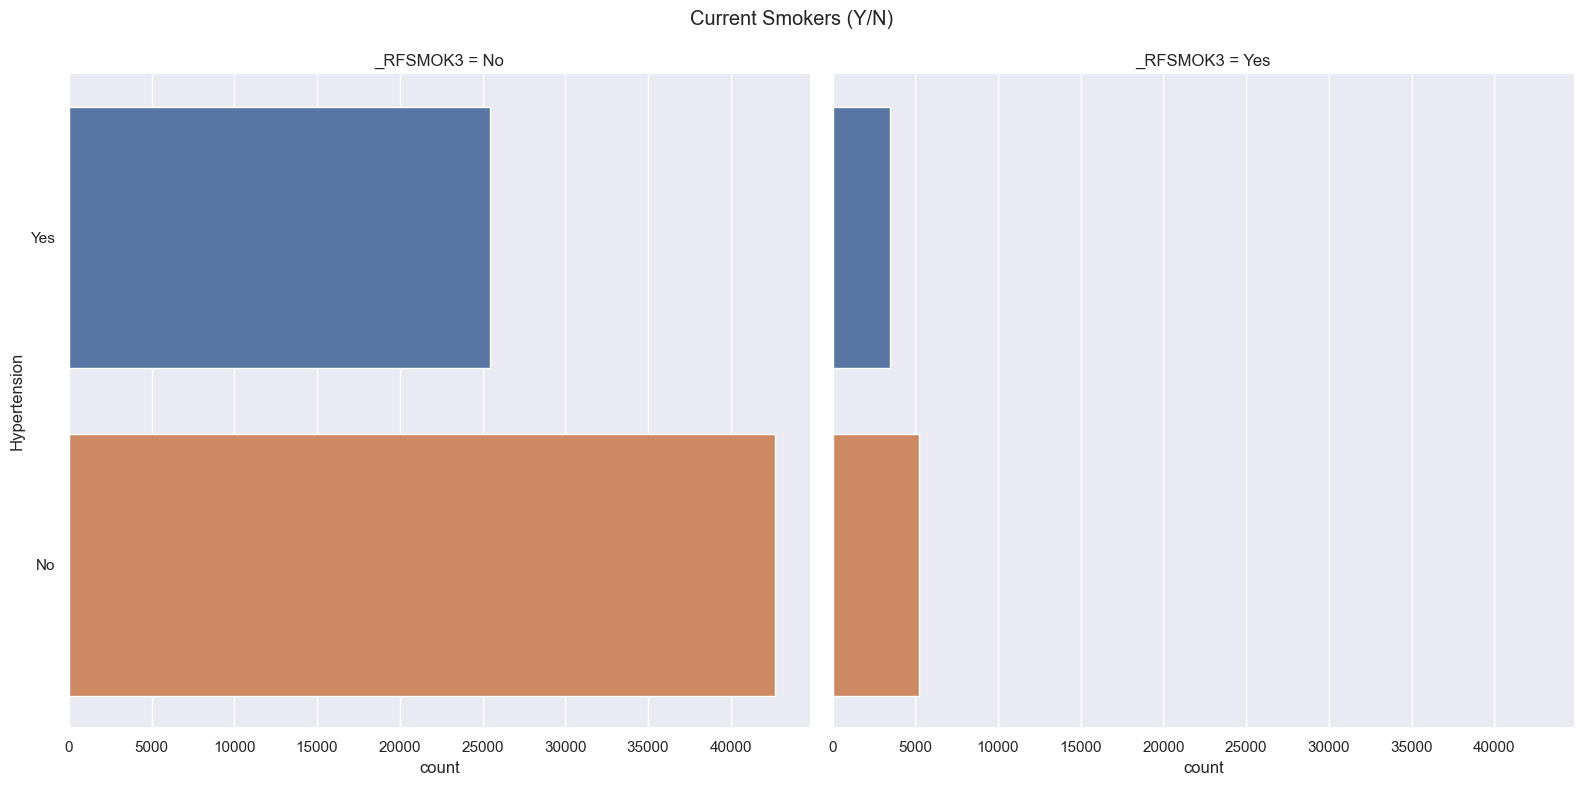

In [27]:
catplot = sb.catplot(y = 'Hypertension', data = hypertension, col = '_RFSMOK3', kind = 'count', col_wrap = 2, height = 8)
catplot.fig.subplots_adjust(top=0.9)
catplot.fig.suptitle('Current Smokers (Y/N)')

**Interpretation of the Plot**</br>
From the catplot, the distribution of `hypertension` is similar for different categories of `_RFSMOK3`, albeit the difference is higher when `_RFSMOK3` is "No". Thus, there is no close relationship between smoke and hypertension.

Text(0.5, 0.98, 'Diagnosed with Arthritis (Y/N)')

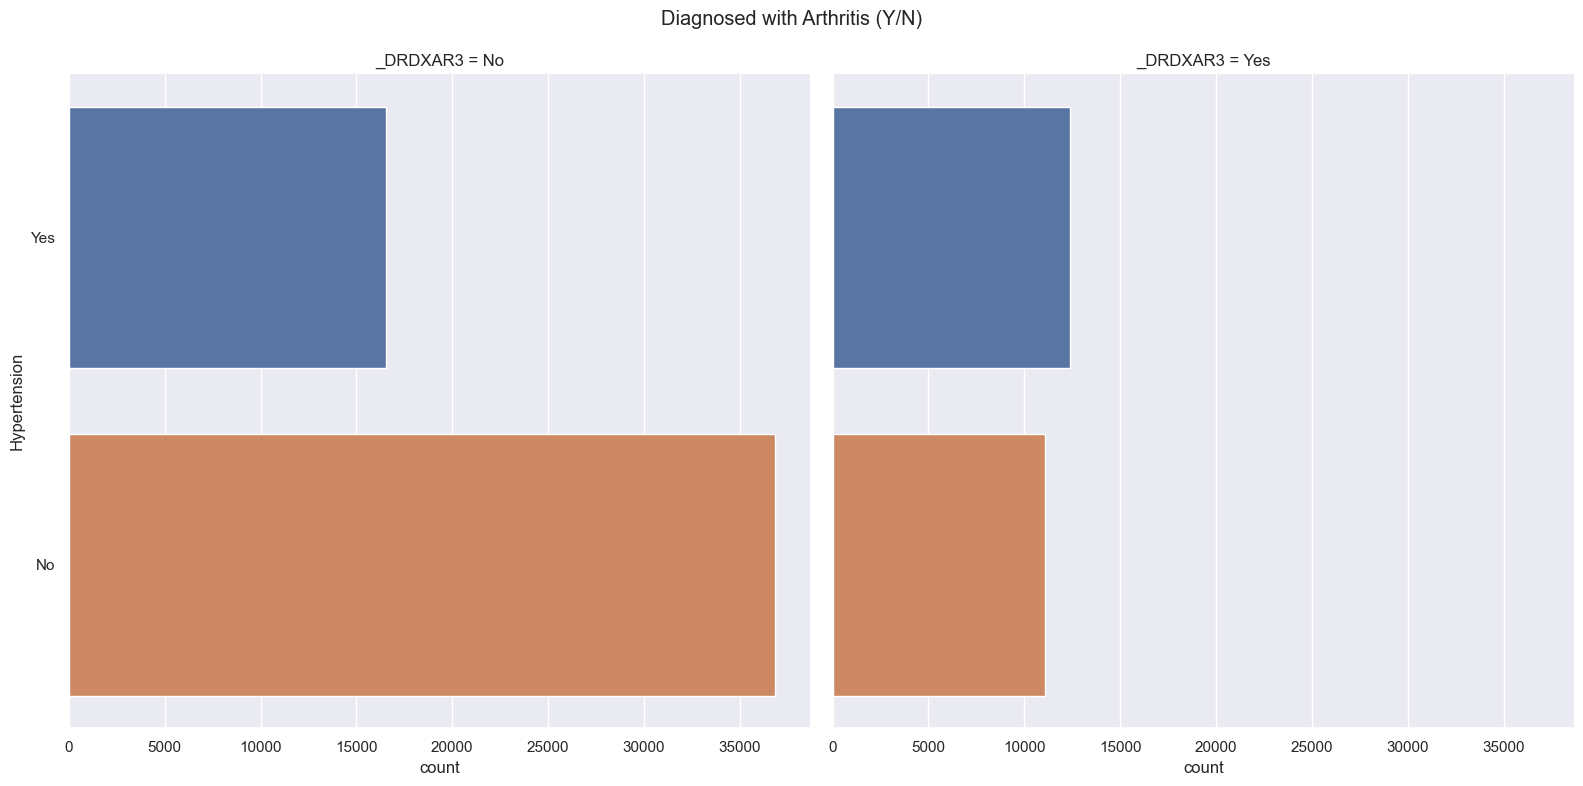

In [28]:
catplot = sb.catplot(y = 'Hypertension', data = hypertension, col = '_DRDXAR3', kind = 'count', col_wrap = 2, height = 8)
catplot.fig.subplots_adjust(top=0.9)
catplot.fig.suptitle('Diagnosed with Arthritis (Y/N)')

**Interpretation of the Plot**</br>
From the catplot, it is evident that the distribution of `hypertension` is different for different categories of `_DRDXAR3`. When `_DRDXAR3` is yes, there are slightly more 'Yes' than 'No' for `hypertension`. But when `_DRDXAR3` is no, there are significantly more 'No' than 'Yes'. Thus, there is a strong relationship between arthritis and hypertension.

Text(0.5, 0.98, 'Race and Ethnicity')

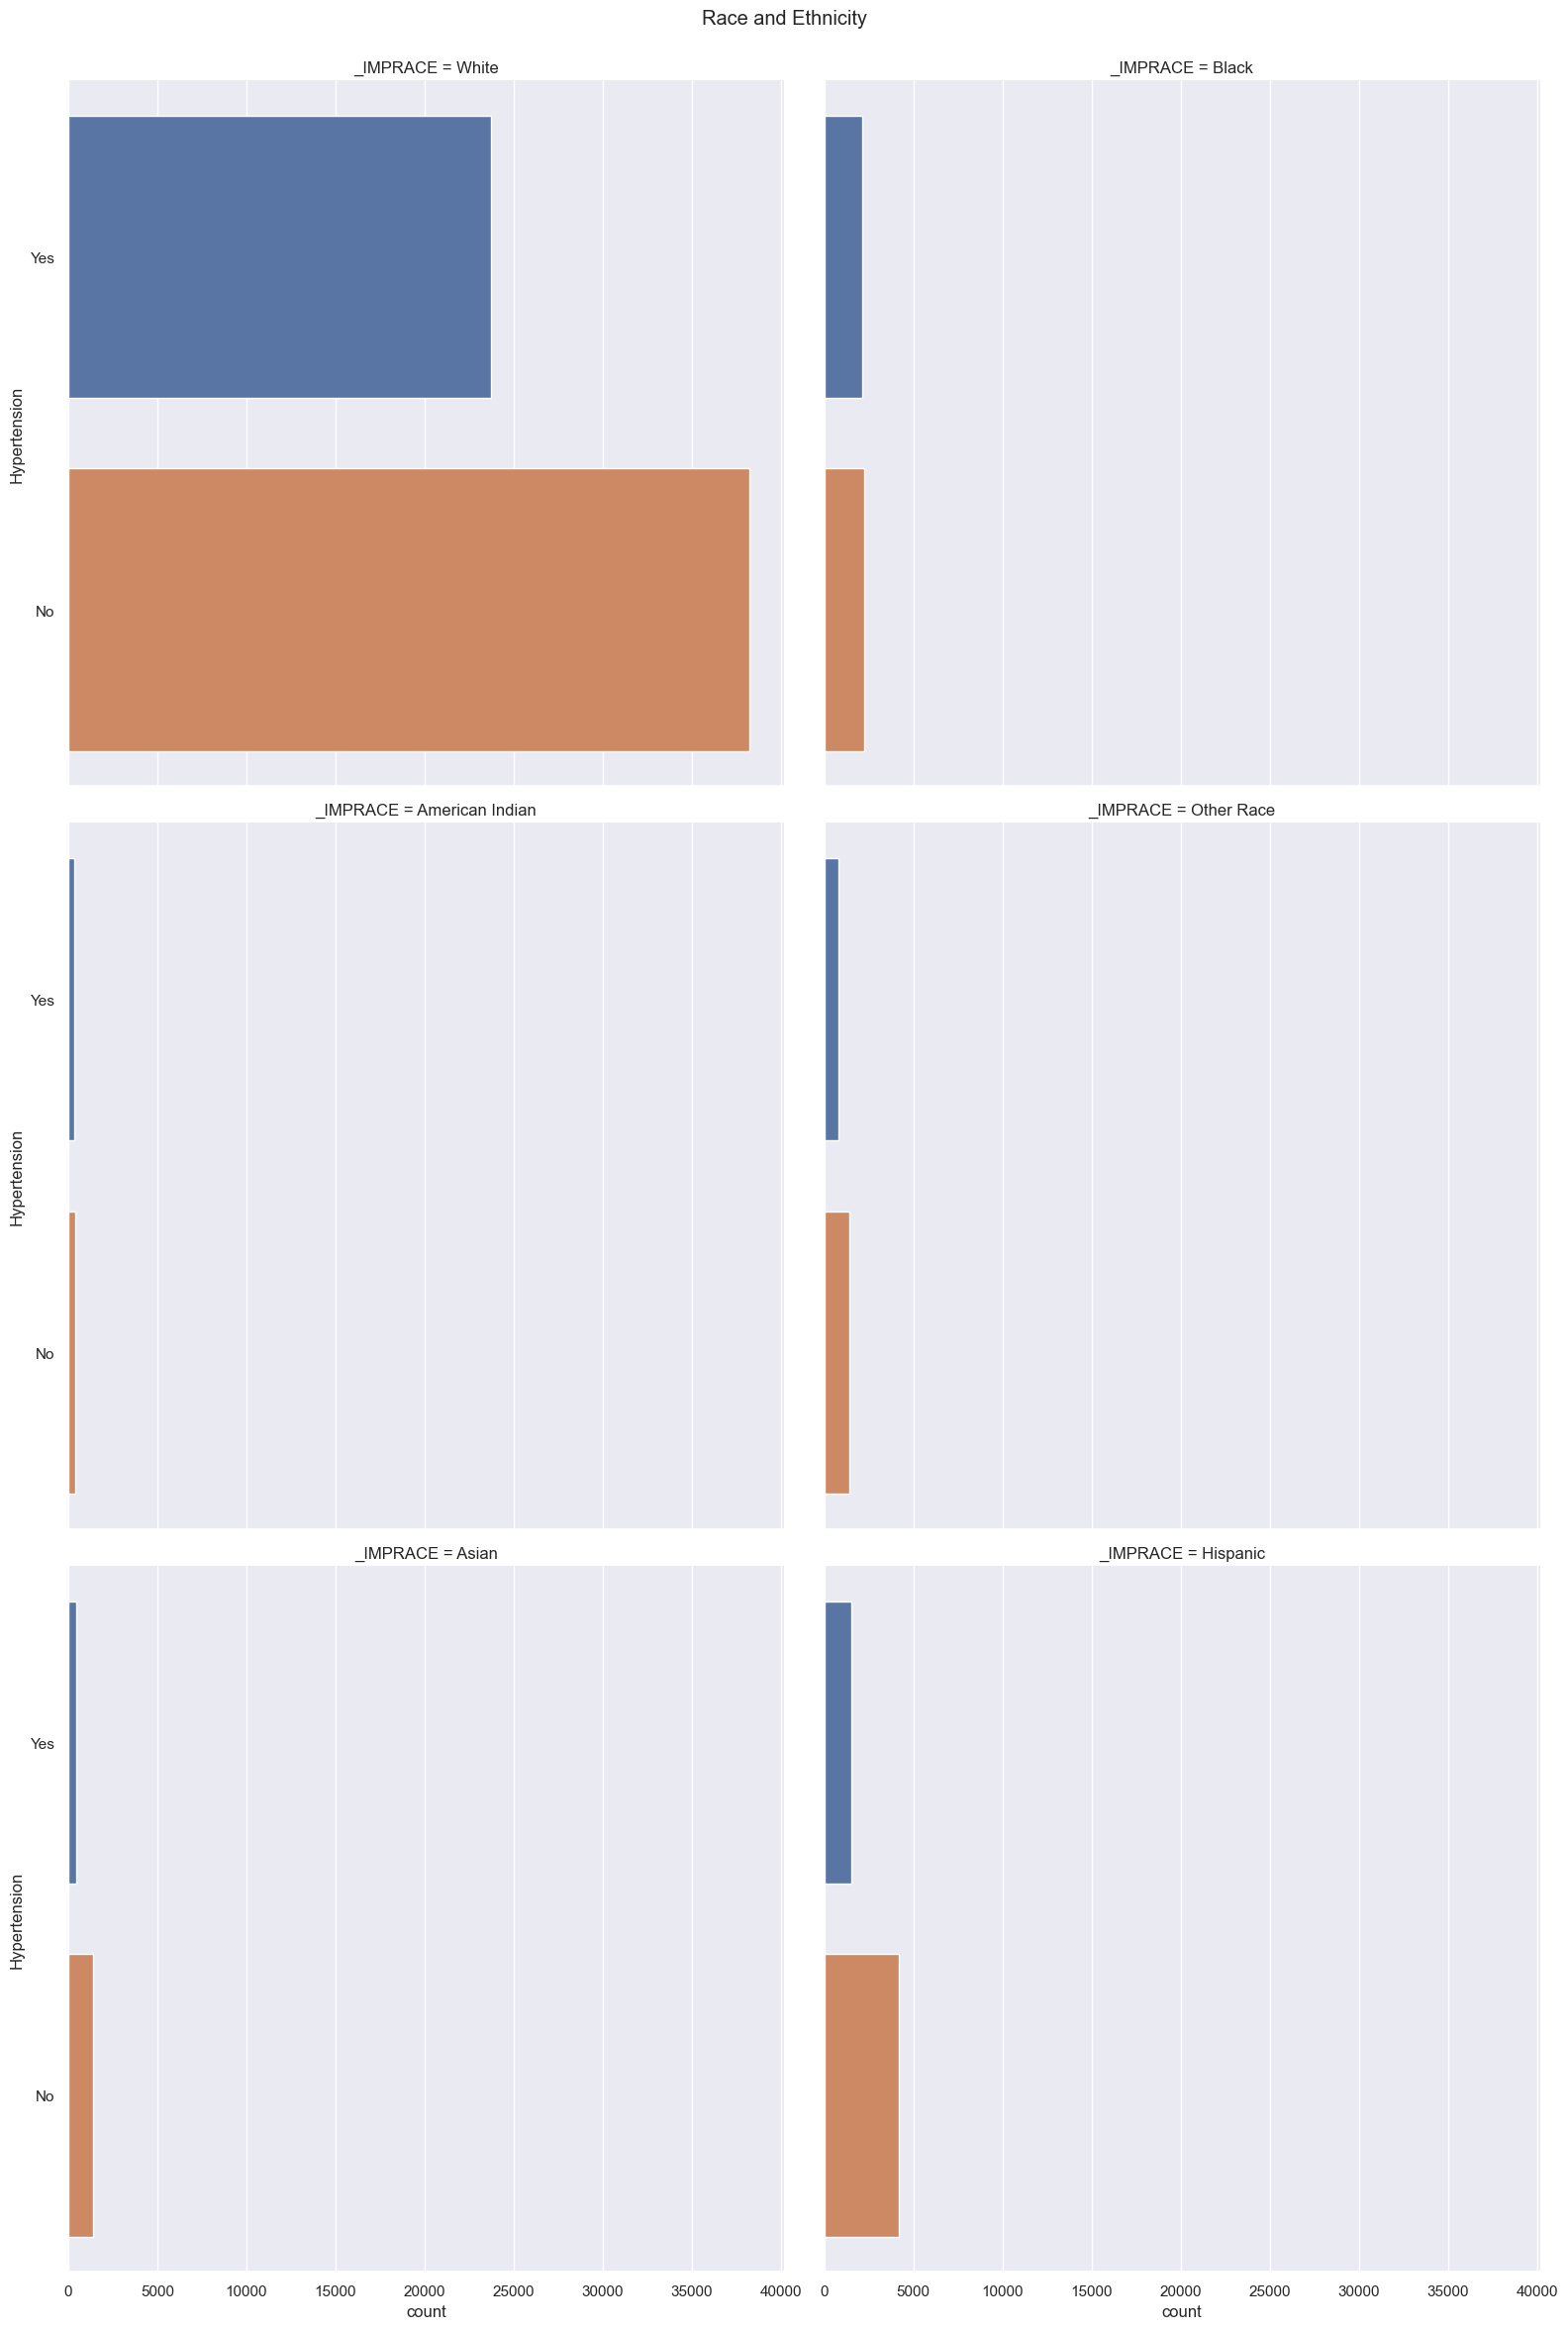

In [29]:
catplot = sb.catplot(y = 'Hypertension', data = hypertension, col = '_IMPRACE', kind = 'count', col_wrap = 2, height = 8)
catplot.fig.subplots_adjust(top=0.95)
catplot.fig.suptitle('Race and Ethnicity')

**Interpretation of the Plot**</br>
From the catplot, it is evident that there is no clear pattern in the distribution of `hypertension` for different categories of `_IMPRACE`. Thus, there is no close relationship between race and hypertension.

#### Summary of Findings
Based on the boxplots, the following categorical variables are identified to have close relationship with hypertension:
1. `_TOTINDA`
2. `CHOLMED3`
3. `DIABETE4`
4. `_RFCHOL3`
5. `_MICHD`
6. `_EDUCAG`
7. `_DRDXAR3`

Thus, they will be used as predictor variables for our machine learning models.